In [13]:
# Importing necessary libraries
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import skew
from sklearn.model_selection import train_test_split


from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/precious-metals-history-since-2000-with-news/final_palladium_data.csv
/kaggle/input/precious-metals-history-since-2000-with-news/final_silver_data.csv
/kaggle/input/precious-metals-history-since-2000-with-news/final_gold_data.csv
/kaggle/input/precious-metals-history-since-2000-with-news/final_platinum_data.csv


In [14]:
# Load the data (palladium)
data_palladium = pd.read_csv("/kaggle/input/precious-metals-history-since-2000-with-news/final_palladium_data.csv", sep=";")
data_palladium.head()

timestamp    open   high    low   close  volume currency   unit  \
0  2000-08-30  717.00  717.0  714.0  711.05    12.0      usd  ounce   
1  2000-08-31  710.00  710.0  710.0  716.75    12.0      usd  ounce   
2  2000-09-01  710.00  710.0  710.0  724.70     2.0      usd  ounce   
3  2000-09-05  710.00  710.0  710.0  720.65     0.0      usd  ounce   
4  2000-09-06  720.65  710.0  710.0  738.00     0.0      usd  ounce   

                                           headlines  
0  Recalls Fuel Disclosure Debate / Deutsche Tele...  
1  Credit Suisse's Wheat Faces Deal / Regulators ...  
2  Nordstrom's Chief Resigns / Judge Dismisses Ca...  
3  Market Pace Slows After 10-Year Run / Clickman...  
4  France Telecom Profit Increases / Locale-Based...

In [15]:
# Load the data (silver)
data_silver = pd.read_csv("/kaggle/input/precious-metals-history-since-2000-with-news/final_silver_data.csv", sep=";")
data_silver.head()

timestamp   open   high    low  close  volume currency   unit  \
0  2000-08-30  4.950  4.950  4.895  4.930  2319.0      usd  ounce   
1  2000-08-31  4.920  5.045  4.920  5.003  1612.0      usd  ounce   
2  2000-09-01  5.035  5.035  4.985  5.004  1375.0      usd  ounce   
3  2000-09-05  4.990  5.005  4.975  4.998   856.0      usd  ounce   
4  2000-09-06  5.000  5.000  4.980  4.983   232.0      usd  ounce   

                                           headlines  
0  Recalls Fuel Disclosure Debate / Deutsche Tele...  
1  Credit Suisse's Wheat Faces Deal / Regulators ...  
2  Nordstrom's Chief Resigns / Judge Dismisses Ca...  
3  Market Pace Slows After 10-Year Run / Clickman...  
4  France Telecom Profit Increases / Locale-Based...

In [16]:
# Load the data (gold)
data_gold = pd.read_csv("/kaggle/input/precious-metals-history-since-2000-with-news/final_gold_data.csv", sep=";")
data_gold.head()

timestamp   open   high    low  close  volume currency   unit  \
0  2000-08-30  273.9  273.9  273.9  273.9       0      usd  ounce   
1  2000-08-31  274.8  278.3  274.8  278.3       0      usd  ounce   
2  2000-09-01  277.0  277.0  277.0  277.0       0      usd  ounce   
3  2000-09-05  275.8  275.8  275.8  275.8       2      usd  ounce   
4  2000-09-06  274.2  274.2  274.2  274.2       0      usd  ounce   

                                           headlines  
0  Recalls Fuel Disclosure Debate / Deutsche Tele...  
1  Credit Suisse's Wheat Faces Deal / Regulators ...  
2  Nordstrom's Chief Resigns / Judge Dismisses Ca...  
3  Market Pace Slows After 10-Year Run / Clickman...  
4  France Telecom Profit Increases / Locale-Based...

In [17]:
# Load the data (platinum)
data_platinum = pd.read_csv("/kaggle/input/precious-metals-history-since-2000-with-news/final_platinum_data.csv", sep=";")
data_platinum.head()

timestamp   open   high    low  close  volume currency   unit  \
0  2000-08-30  593.9  602.0  590.1  591.4   842.0      usd  ounce   
1  2000-08-31  589.0  592.0  584.5  586.7   358.0      usd  ounce   
2  2000-09-01  588.0  598.0  588.0  595.3   716.0      usd  ounce   
3  2000-09-05  602.0  604.5  595.5  601.3  1161.0      usd  ounce   
4  2000-09-06  603.0  612.0  603.0  611.1   865.0      usd  ounce   

                                           headlines  
0  Recalls Fuel Disclosure Debate / Deutsche Tele...  
1  Credit Suisse's Wheat Faces Deal / Regulators ...  
2  Nordstrom's Chief Resigns / Judge Dismisses Ca...  
3  Market Pace Slows After 10-Year Run / Clickman...  
4  France Telecom Profit Increases / Locale-Based...

# Exploring the data

In [18]:
def overview(data, name):
    print(f"\n{name} goldset Overview")
    print(f"Shape: {data.shape}")
    print("=".center(50,"="))

    print("Information about the features:")
    print(data.info())
    print("=".center(50,"="))

    print("Basic statistics check:")
    print(data.describe())
    print("=".center(50,"="))

    print("Checking the number of unique values:")
    unique_counts = {}
    for column in data.columns:
        unique_counts[column] = data[column].nunique()  
    unique_df = pd.DataFrame(unique_counts, index=["Unique Count"]).transpose()
    print(unique_df)
    print("=".center(50, "="))

In [19]:
# Palladium
overview(data_palladium, "Palladium")


Palladium goldset Overview
Shape: (5731, 9)
Information about the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5731 entries, 0 to 5730
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  5731 non-null   object 
 1   open       5731 non-null   float64
 2   high       5731 non-null   float64
 3   low        5731 non-null   float64
 4   close      5731 non-null   float64
 5   volume     5731 non-null   float64
 6   currency   5731 non-null   object 
 7   unit       5731 non-null   object 
 8   headlines  5731 non-null   object 
dtypes: float64(5), object(4)
memory usage: 403.1+ KB
None
Basic statistics check:
              open         high          low        close        volume
count  5731.000000  5731.000000  5731.000000  5731.000000   5731.000000
mean    874.640464   876.842392   871.751265   874.258820    178.096667
std     639.705691   640.095895   638.165624   638.464667    652.677761
min   

In [20]:
# Silver
overview(data_silver, "Silver")


Silver goldset Overview
Shape: (6176, 9)
Information about the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6176 entries, 0 to 6175
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  6176 non-null   object 
 1   open       6176 non-null   float64
 2   high       6176 non-null   float64
 3   low        6176 non-null   float64
 4   close      6176 non-null   float64
 5   volume     6176 non-null   float64
 6   currency   6176 non-null   object 
 7   unit       6176 non-null   object 
 8   headlines  6176 non-null   object 
dtypes: float64(5), object(4)
memory usage: 434.4+ KB
None
Basic statistics check:
              open         high          low        close         volume
count  6176.000000  6176.000000  6176.000000  6176.000000    6176.000000
mean     17.231361    17.347975    17.102428    17.224150    1454.875324
std       8.611617     8.701887     8.510736     8.604334    8489.667302
min  

In [21]:
# Gold
overview(data_gold, "Gold")


Gold goldset Overview
Shape: (6177, 9)
Information about the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6177 entries, 0 to 6176
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  6177 non-null   object 
 1   open       6177 non-null   float64
 2   high       6177 non-null   float64
 3   low        6177 non-null   float64
 4   close      6177 non-null   float64
 5   volume     6177 non-null   int64  
 6   currency   6177 non-null   object 
 7   unit       6177 non-null   object 
 8   headlines  6177 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 434.4+ KB
None
Basic statistics check:
              open         high          low        close         volume
count  6177.000000  6177.000000  6177.000000  6177.000000    6177.000000
mean   1181.017241  1186.953392  1174.885090  1181.012304    4298.049377
std     606.257425   609.741360   602.902334   606.424369   24281.9118

In [22]:
# Platinum
overview(data_platinum, "Platinum")


Platinum goldset Overview
Shape: (5490, 9)
Information about the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  5490 non-null   object 
 1   open       5490 non-null   float64
 2   high       5490 non-null   float64
 3   low        5490 non-null   float64
 4   close      5490 non-null   float64
 5   volume     5490 non-null   float64
 6   currency   5490 non-null   object 
 7   unit       5490 non-null   object 
 8   headlines  5490 non-null   object 
dtypes: float64(5), object(4)
memory usage: 386.1+ KB
None
Basic statistics check:
              open         high          low        close       volume
count  5490.000000  5490.000000  5490.000000  5490.000000   5490.00000
mean   1070.423989  1073.386685  1067.644299  1070.695228    324.22714
std     347.155856   347.166696   347.219916   347.274797   1239.51526
min     406

# **Fields and Data Types 🗒️**  
Dataset containing historical price and volume data for precious metals (Palladium, Silver, Gold, and Platinum), including market open, high, low, close values, trading volume, and associated news headlines.  

## **Data Dictionary**  

### **Common Fields (All Datasets)**  

| **Parameter**            | **Description**                                                                                                                                      |
|--------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| `timestamp`              | Date and time of the recorded market data.                                                                                                      |
| `open`                   | Opening price of the metal at the beginning of the trading period.                                                                              |
| `high`                   | Highest price of the metal during the trading period.                                                                                           |
| `low`                    | Lowest price of the metal during the trading period.                                                                                            |
| `close`                  | Closing price of the metal at the end of the trading period.                                                                                    |
| `volume`                 | Trading volume (number of units traded) during the period.                                                                                      |
| `currency`               | Currency in which the metal is traded (e.g., USD).                                                                                              |
| `unit`                   | Unit of measurement for price (e.g., "per ounce").                                                                                              |
| `headlines`              | News headlines related to the metal market during the period.                                                                                   |

---

### **Dataset-Specific Details**  

#### **1. Palladium Dataset**  
- **Shape**: 6,176 entries × 9 columns  
- **Key Statistics**:  
  - Mean `close` price: **17.22**  
  - Max `close` price: **48.58**  
  - Mean `volume`: **1,454.88**  

#### **2. Silver Dataset**  
- **Shape**: 6,176 entries × 9 columns  
- **Key Statistics**:  
  - Mean `close` price: **17.22**  
  - Max `close` price: **48.58**  
  - Mean `volume`: **1,454.88**  

#### **3. Gold Dataset**  
- **Shape**: 6,177 entries × 9 columns  
- **Key Statistics**:  
  - Mean `close` price: **1,181.01**  
  - Max `close` price: **3,222.20**  
  - Mean `volume`: **4,298.05**  
- **Note**: `volume` is stored as `int64` (unlike other datasets where it's `float64`).  

#### **4. Platinum Dataset**  
- **Shape**: 5,490 entries × 9 columns  
- **Key Statistics**:  
  - Mean `close` price: **1,070.70**  
  - Max `close` price: **2,251.10**  
  - Mean `volume`: **324.23**  

---

### **Notes**:  
- **Price Trends**: Gold has the highest mean closing price (~ 1,181), followed by Platinum (~ 1,070), Palladium (~ 17.22), and Silver (~ 17.22).  
- **Volume Analysis**: Gold has the highest average trading volume (~ 4,298), while Platinum has the lowest (~ 324).  
- **Timestamps**: All datasets cover a similar time range, except Platinum, which has fewer entries (5,490 vs. ~ 6,176).  
- **News Headlines**: The `headlines` column can be used for sentiment analysis to correlate news events with price movements.  
- **Currency & Units**: All prices are in USD per unit (likely troy ounce for precious metals).  

# Handle Timestamp

In [23]:
for data in [data_gold, data_silver, data_platinum, data_palladium]:
    data['timestamp'] = pd.to_datetime(data['timestamp'])

In [24]:
print(data_gold['timestamp'].min(), data_gold['timestamp'].max())

2000-08-30 00:00:00 2025-04-14 00:00:00


# EDA (Exploratory Data Analysis)

In [28]:
# Calculate daily returns
def calculate_returns(data):    
    data['daily_return'] = data['close'].pct_change()
    return data

# Perform a comprehensive analysis of a precious metal with interactive visualizations.
def analyze_precious_metal(data, metal_name, color):
    """  
    Parameters:
        data: Precious metal data
        metal_name: Name of the metal (for titles)
        color: Primary color for visualizations
    """
    # Initial setup
    background_color = "#f8fafc"
    plt.style.use('seaborn')
    
    # Preprocessing
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data = calculate_returns(data)
    
    # Set up the figure
    fig = plt.figure(figsize=(24, 30))
    gs = fig.add_gridspec(6, 2)
    gs.update(wspace=0.5, hspace=0.8)
    
    # Create axes
    axes = [fig.add_subplot(gs[i, j]) for i in range(6) for j in range(2)]
    for ax in axes:
        ax.set_facecolor(background_color)
    
    # Main title
    axes[0].axis('off')
    axes[0].text(0.5, 0.5,
                 f'{metal_name} Analysis\n_________________',
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontsize=18, fontweight='bold',
                 fontfamily='serif',
                 color="#000000")
    
    # 1. Closing price over time
    axes[1].plot(data['timestamp'], data['close'], color=color, linewidth=2)
    axes[1].set_title(f'{metal_name} Closing Price Over Time', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Price')
    axes[1].grid(True, linestyle='--', alpha=0.6)
    
    # 2. Trading volume vs closing price (secondary axis)
    ax2 = axes[2].twinx()
    axes[2].plot(data['timestamp'], data['volume'], color='orange', alpha=0.6)
    ax2.plot(data['timestamp'], data['close'], color=color, linewidth=2)
    axes[2].set_title(f'{metal_name} Volume vs Close Price', fontsize=14, fontweight='bold')
    axes[2].set_ylabel('Volume', color='orange')
    ax2.set_ylabel('Close Price', color=color)
    axes[2].grid(True, linestyle='--', alpha=0.6)
    
    # 3. Daily returns distribution
    returns = data['daily_return'].dropna()
    skewness = skew(returns)
    sns.histplot(ax=axes[3], x=returns, bins=100, kde=True, color=color)
    axes[3].set_title(f'Daily Returns Distribution\nSkewness = {skewness:.4f}', fontsize=14, fontweight='bold')
    axes[3].set_xlabel('Daily Return')
    axes[3].grid(True, linestyle='--', alpha=0.6)
    
    # 4. Boxplot of prices (open, high, low, close)
    price_cols = data[['open', 'high', 'low', 'close']].melt()
    sns.boxplot(ax=axes[4], data=price_cols, x='variable', y='value', color=color)
    axes[4].set_title('Price Distribution (Open, High, Low, Close)', fontsize=14, fontweight='bold')
    axes[4].set_ylabel('Price')
    axes[4].grid(True, linestyle='--', alpha=0.6)
    
    # 5. Correlation matrix between numerical variables
    numeric_cols = data.select_dtypes(include=[np.number])
    if not numeric_cols.empty:
        corr_matrix = numeric_cols.corr()
        sns.heatmap(ax=axes[5], data=corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=False)
        axes[5].set_title('Correlation Matrix', fontsize=14, fontweight='bold')
    
    # 6. Volume distribution
    sns.histplot(ax=axes[6], data=data, x='volume', kde=True, color=color)
    axes[6].set_title('Volume Distribution', fontsize=14, fontweight='bold')
    axes[6].set_xlabel('Volume')
    axes[6].grid(True, linestyle='--', alpha=0.6)
    
    # 7. Volatility analysis (rolling standard deviation)
    data['rolling_std'] = data['daily_return'].rolling(30).std()
    axes[7].plot(data['timestamp'], data['rolling_std'], color=color)
    axes[7].set_title('30-Day Rolling Volatility', fontsize=14, fontweight='bold')
    axes[7].set_ylabel('Standard Deviation')
    axes[7].grid(True, linestyle='--', alpha=0.6)
    
    # 8. Word cloud from news headlines
    if 'headlines' in data.columns:
        text = " ".join(headline for headline in data['headlines'].astype(str))
        wordcloud = WordCloud(background_color=background_color, width=800, height=400).generate(text)
        axes[8].imshow(wordcloud, interpolation='bilinear')
        axes[8].axis('off')
        axes[8].set_title('News Headlines Word Cloud', fontsize=14, fontweight='bold')
    
    # 9. Sentiment analysis (if headlines exist)
    if 'headlines' in data.columns:
        sia = SentimentIntensityAnalyzer()
        data['sentiment_score'] = data['headlines'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
        daily_sentiment = data.groupby(data['timestamp'].dt.date)['sentiment_score'].mean()
        axes[9].plot(pd.to_datetime(daily_sentiment.index), daily_sentiment.values, color=color)
        axes[9].set_title('Daily Average Sentiment Score', fontsize=14, fontweight='bold')
        axes[9].set_ylabel('Sentiment Score')
        axes[9].grid(True, linestyle='--', alpha=0.6)
    
    # 10. Relationship between sentiment and returns (if headlines exist)
    if 'headlines' in data.columns and 'daily_return' in data.columns:
        sentiment_returns = pd.merge(
            daily_sentiment, 
            data[['timestamp', 'daily_return']], 
            left_index=True, 
            right_on=data['timestamp'].dt.date, 
            how='inner'
        )
        axes[10].scatter(sentiment_returns['sentiment_score'], sentiment_returns['daily_return'], color=color)
        axes[10].set_title('Sentiment vs Daily Returns', fontsize=14, fontweight='bold')
        axes[10].set_xlabel('Sentiment Score')
        axes[10].set_ylabel('Daily Return')
        axes[10].grid(True, linestyle='--', alpha=0.6)
    
    # 11. Average monthly closing price
    data['month'] = data['timestamp'].dt.month
    monthly_avg = data.groupby('month')['close'].mean()
    axes[11].plot(monthly_avg.index, monthly_avg.values, marker='o', color=color)
    axes[11].set_title('Average Monthly Price', fontsize=14, fontweight='bold')
    axes[11].set_xlabel('Month')
    axes[11].set_ylabel('Average Price')
    axes[11].set_xticks(range(1, 13))
    axes[11].grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()
    
    # Additional interactive visualizations with Plotly
    # Interactive closing price chart
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=data['timestamp'],
        y=data['close'],
        mode='lines',
        name=f'{metal_name} Close Price',
        line=dict(color=color)
    ))
    fig.update_layout(
        title=f'{metal_name} Closing Price Over Time',
        xaxis_title='Date',
        yaxis_title='Close Price',
        template='plotly_white'
    )
    fig.show()
    
    # Interactive volume vs closing price chart
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=data['timestamp'],
        y=data['volume'],
        mode='lines',
        name='Volume',
        line=dict(color='orange'),
        yaxis='y1'
    ))
    fig.add_trace(go.Scatter(
        x=data['timestamp'],
        y=data['close'],
        mode='lines',
        name='Close Price',
        line=dict(color=color),
        yaxis='y2'
    ))
    fig.update_layout(
        title=f'{metal_name} Volume vs Close Price',
        xaxis_title='Date',
        yaxis=dict(title='Volume', side='left'),
        yaxis2=dict(title='Close Price', side='right', overlaying='y'),
        template='plotly_white'
    )
    fig.show()


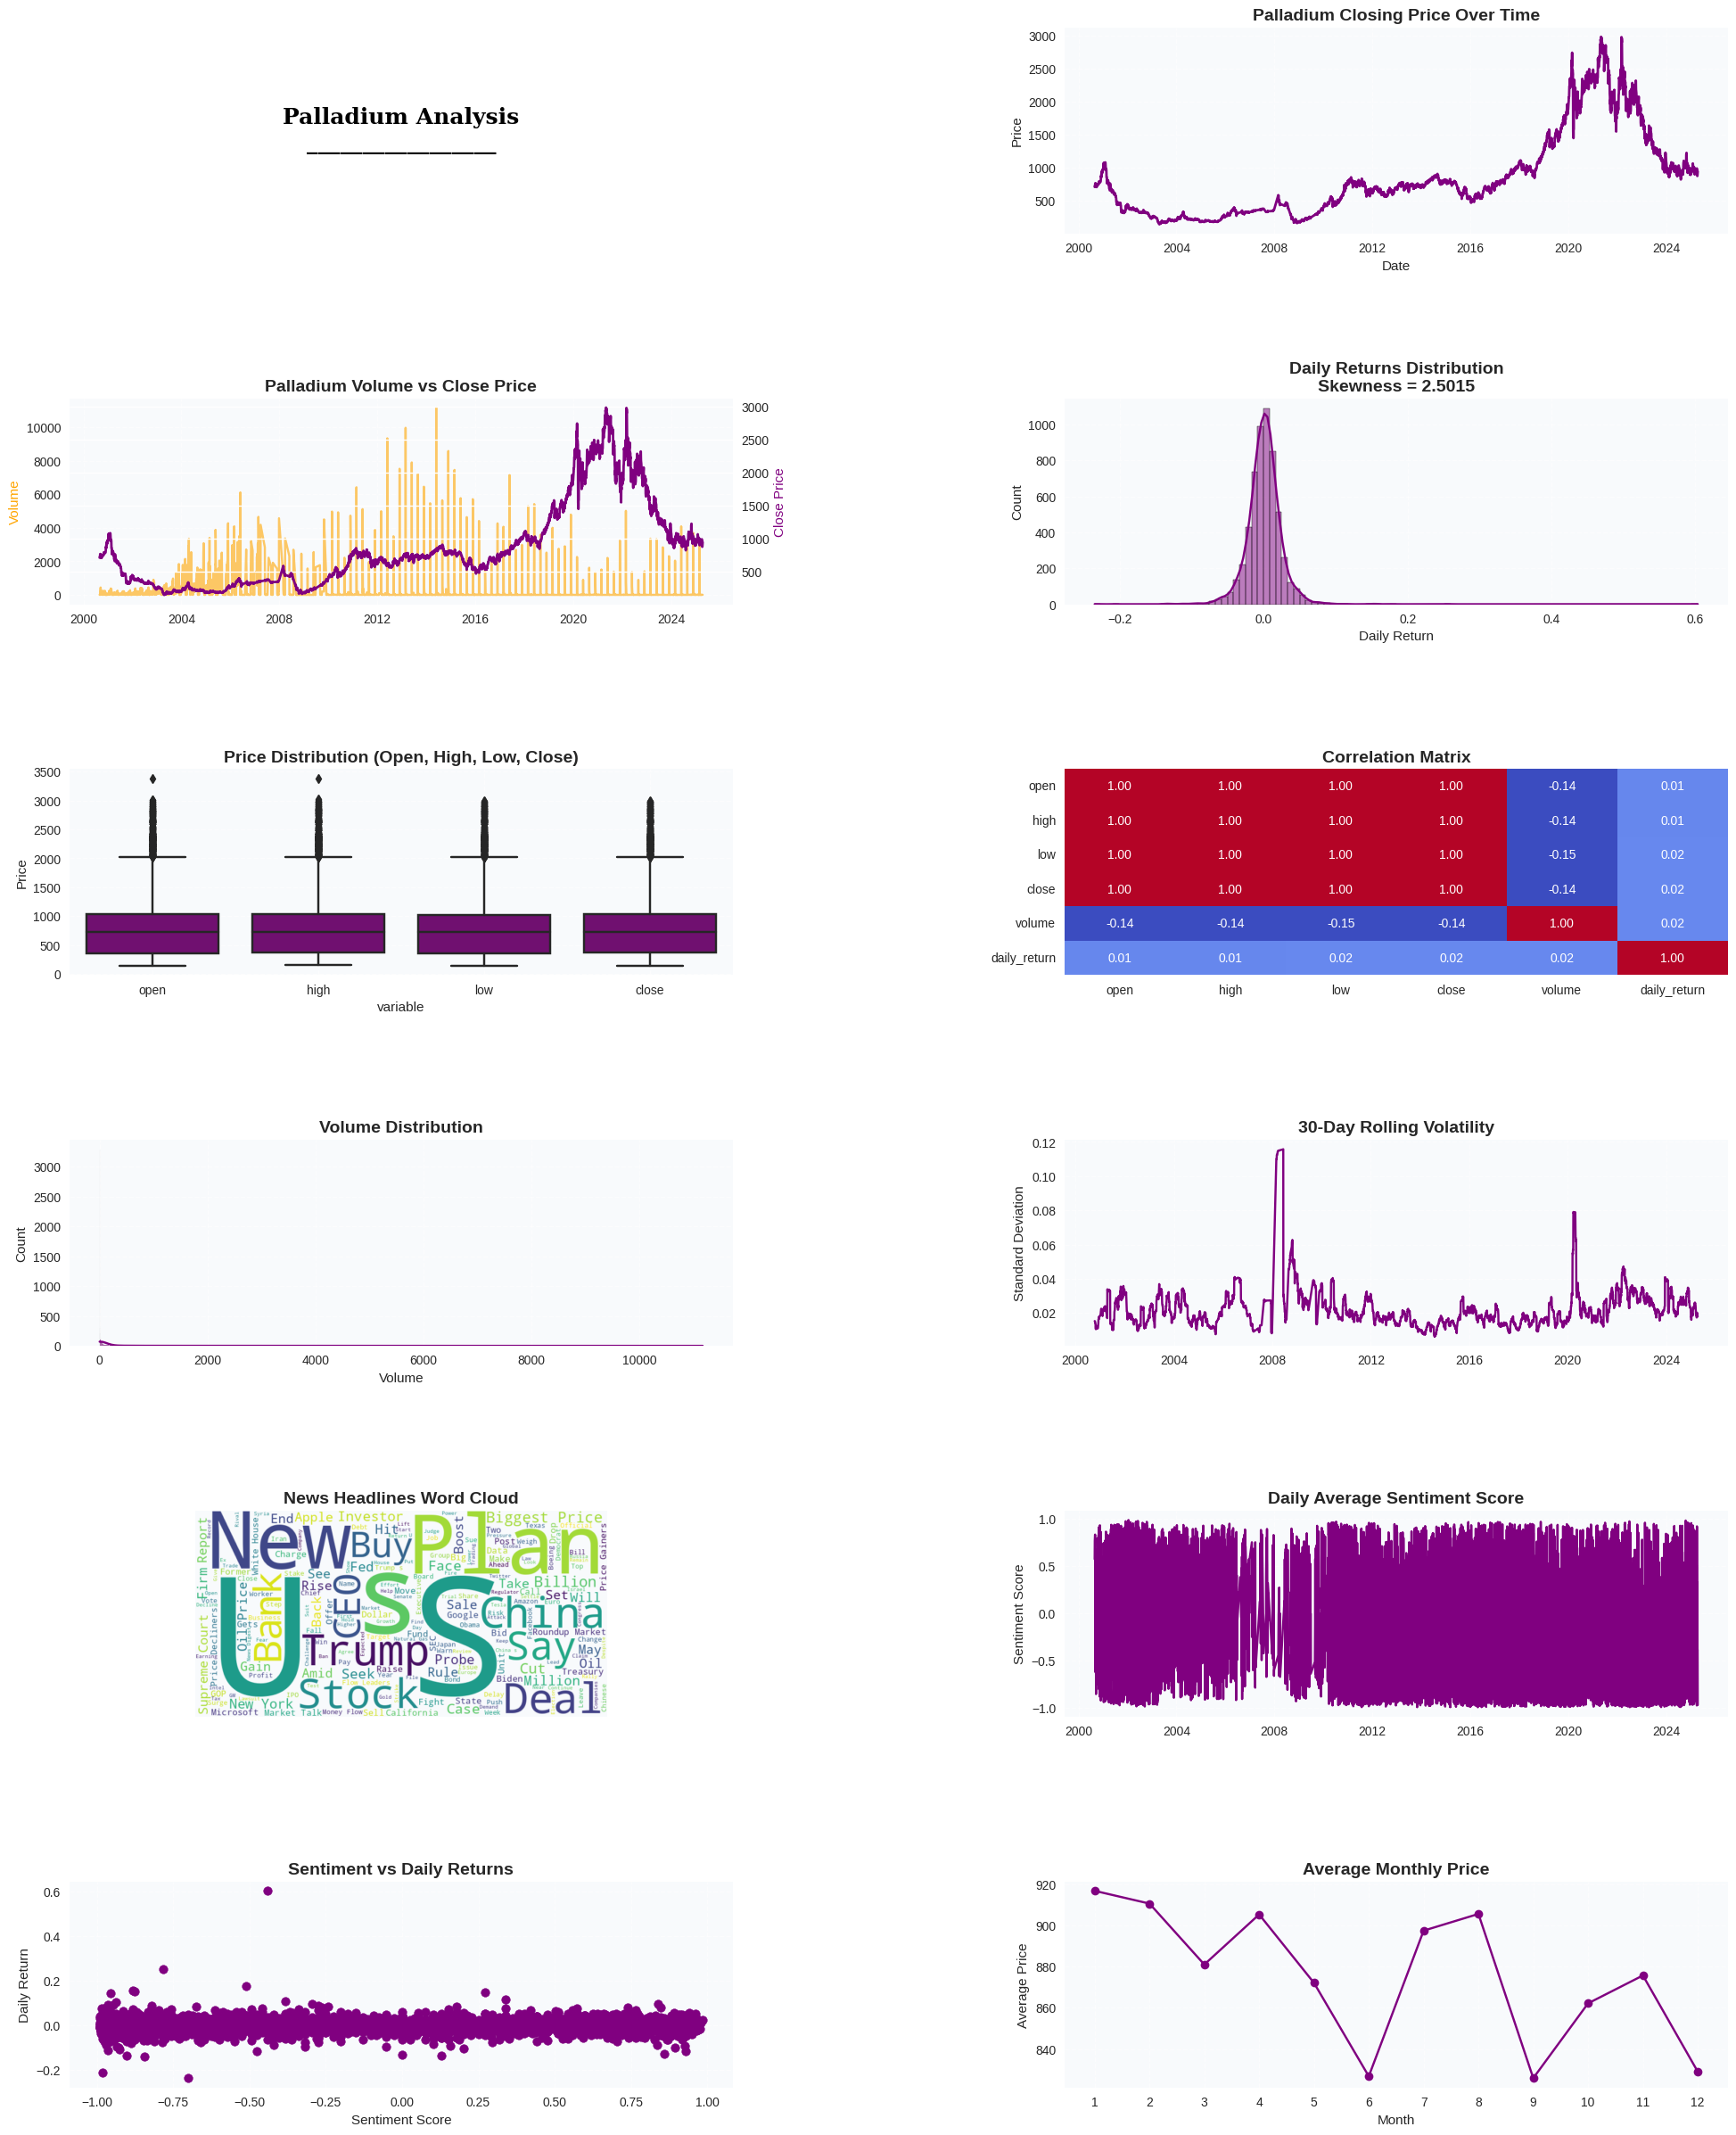

In [31]:
# Palladium
analyze_precious_metal(data_palladium, 'Palladium', 'purple')

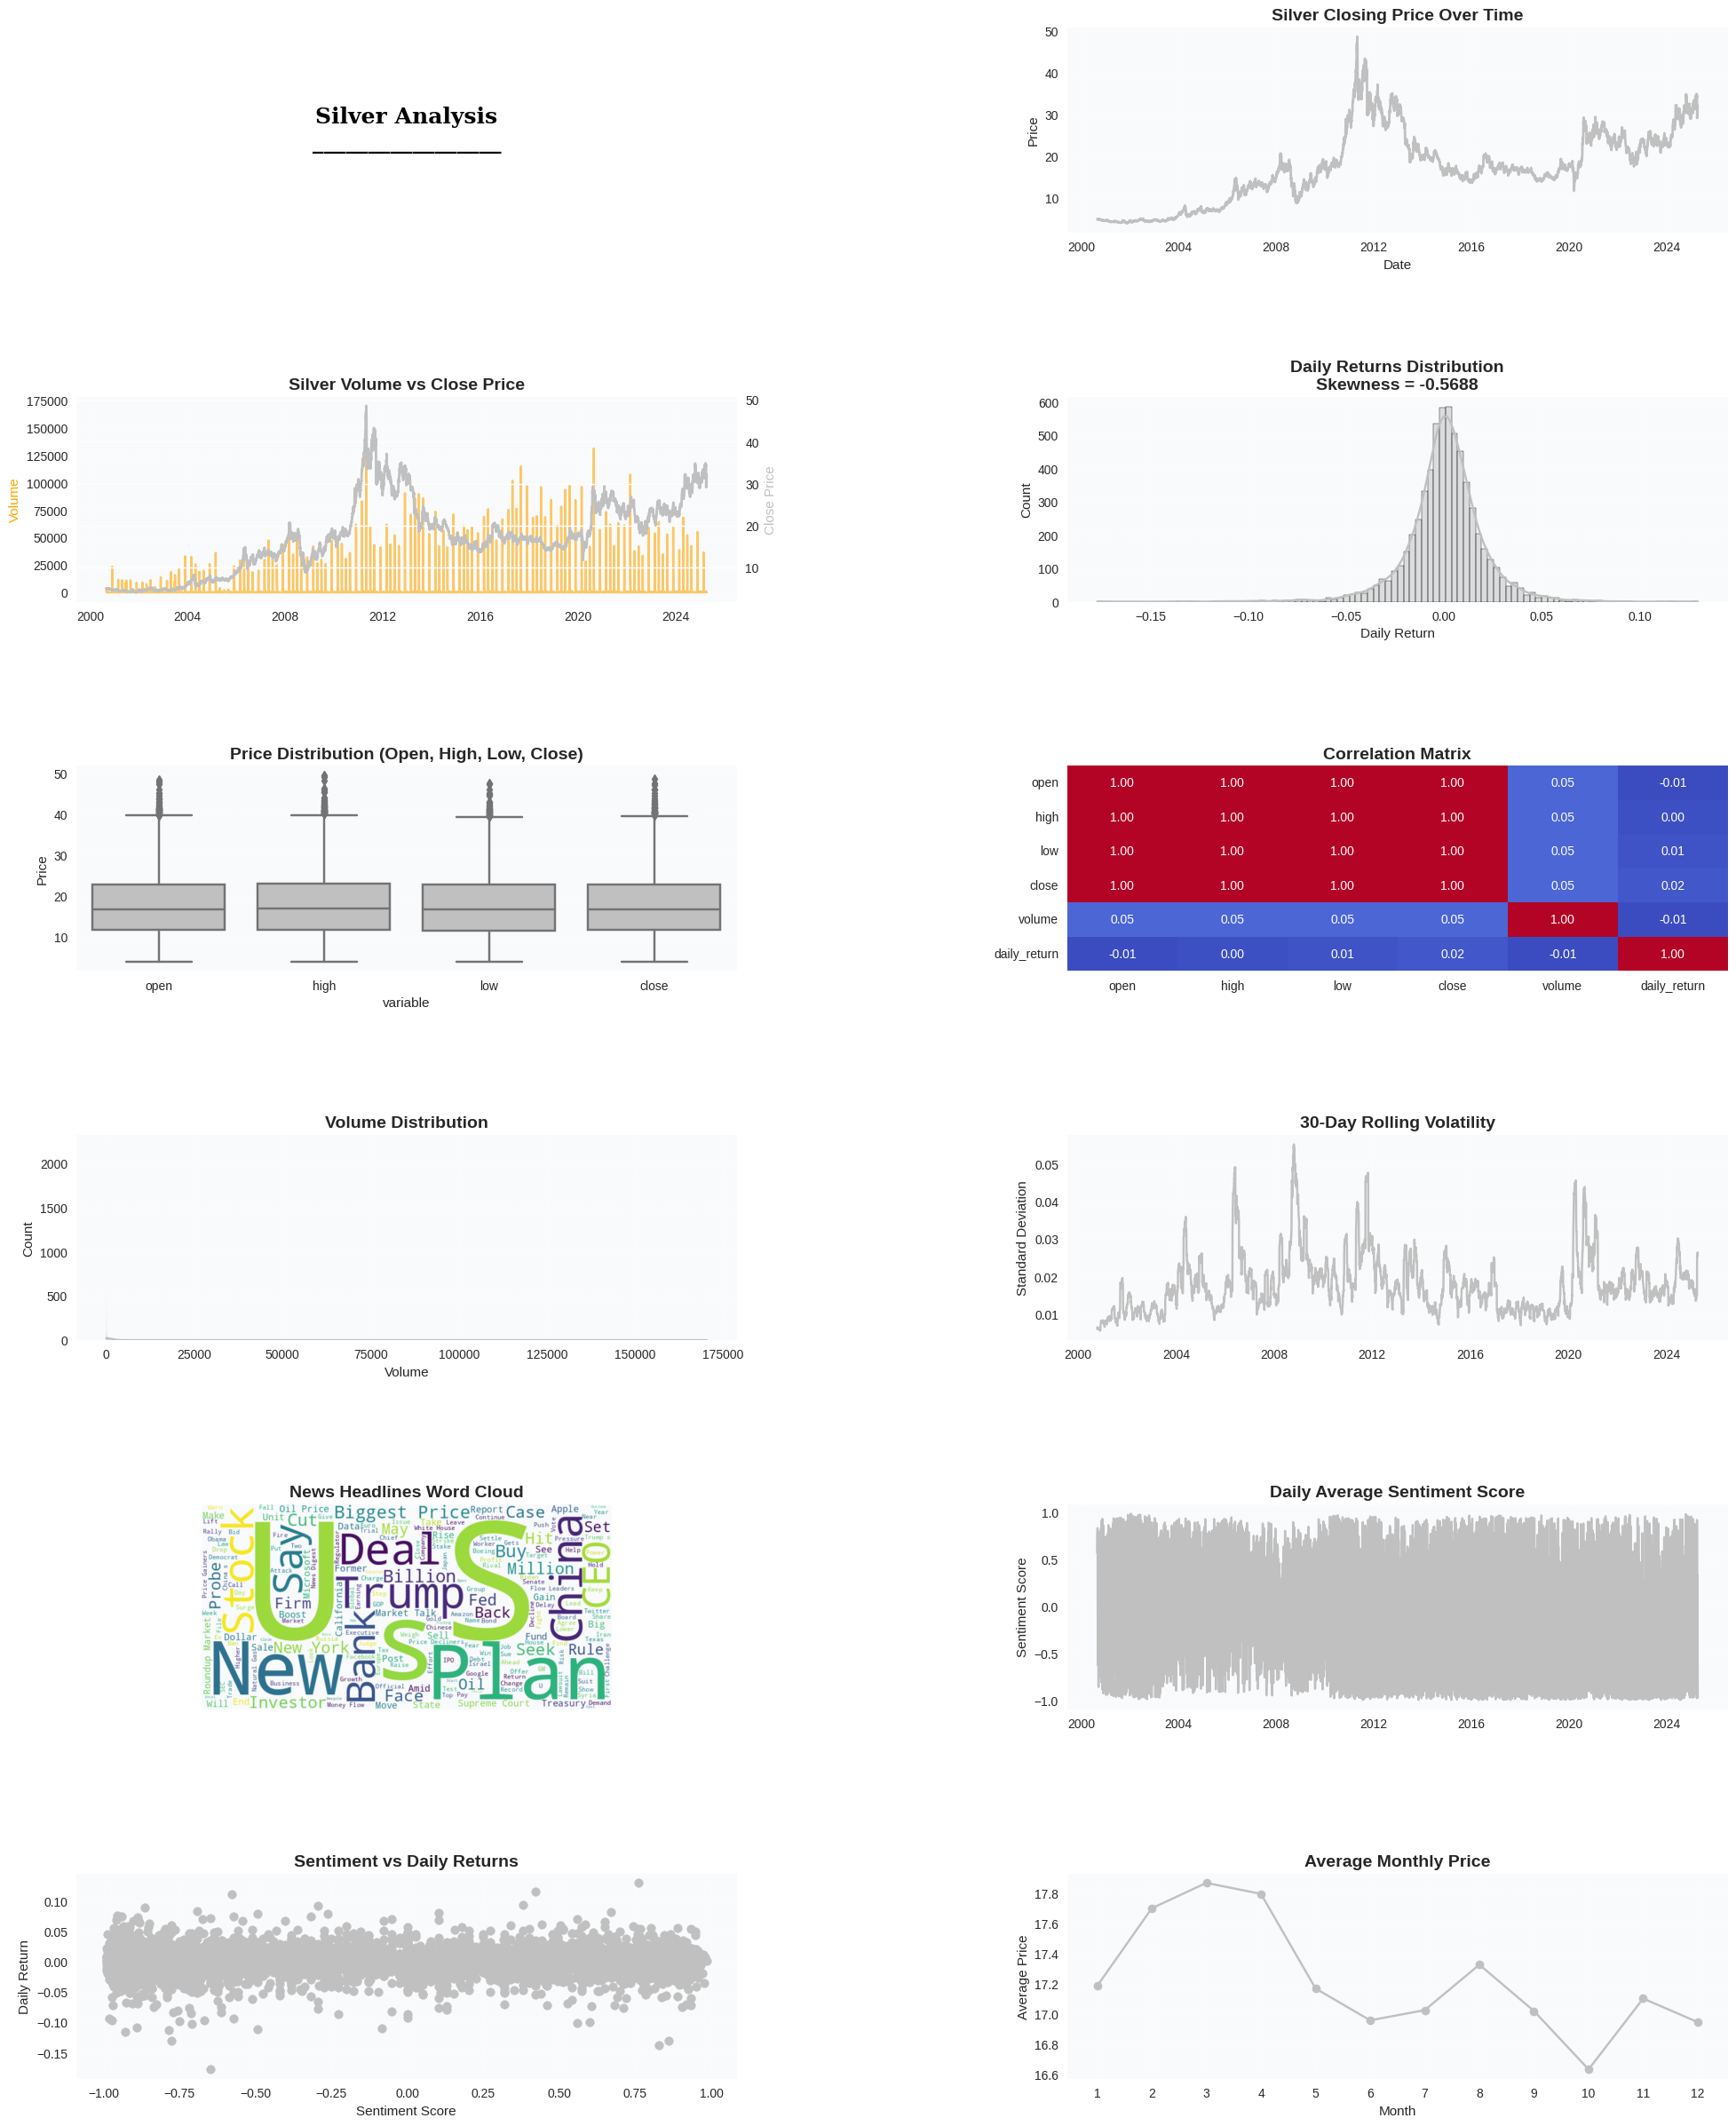

In [33]:
# Silver
analyze_precious_metal(data_silver, 'Silver', 'silver')

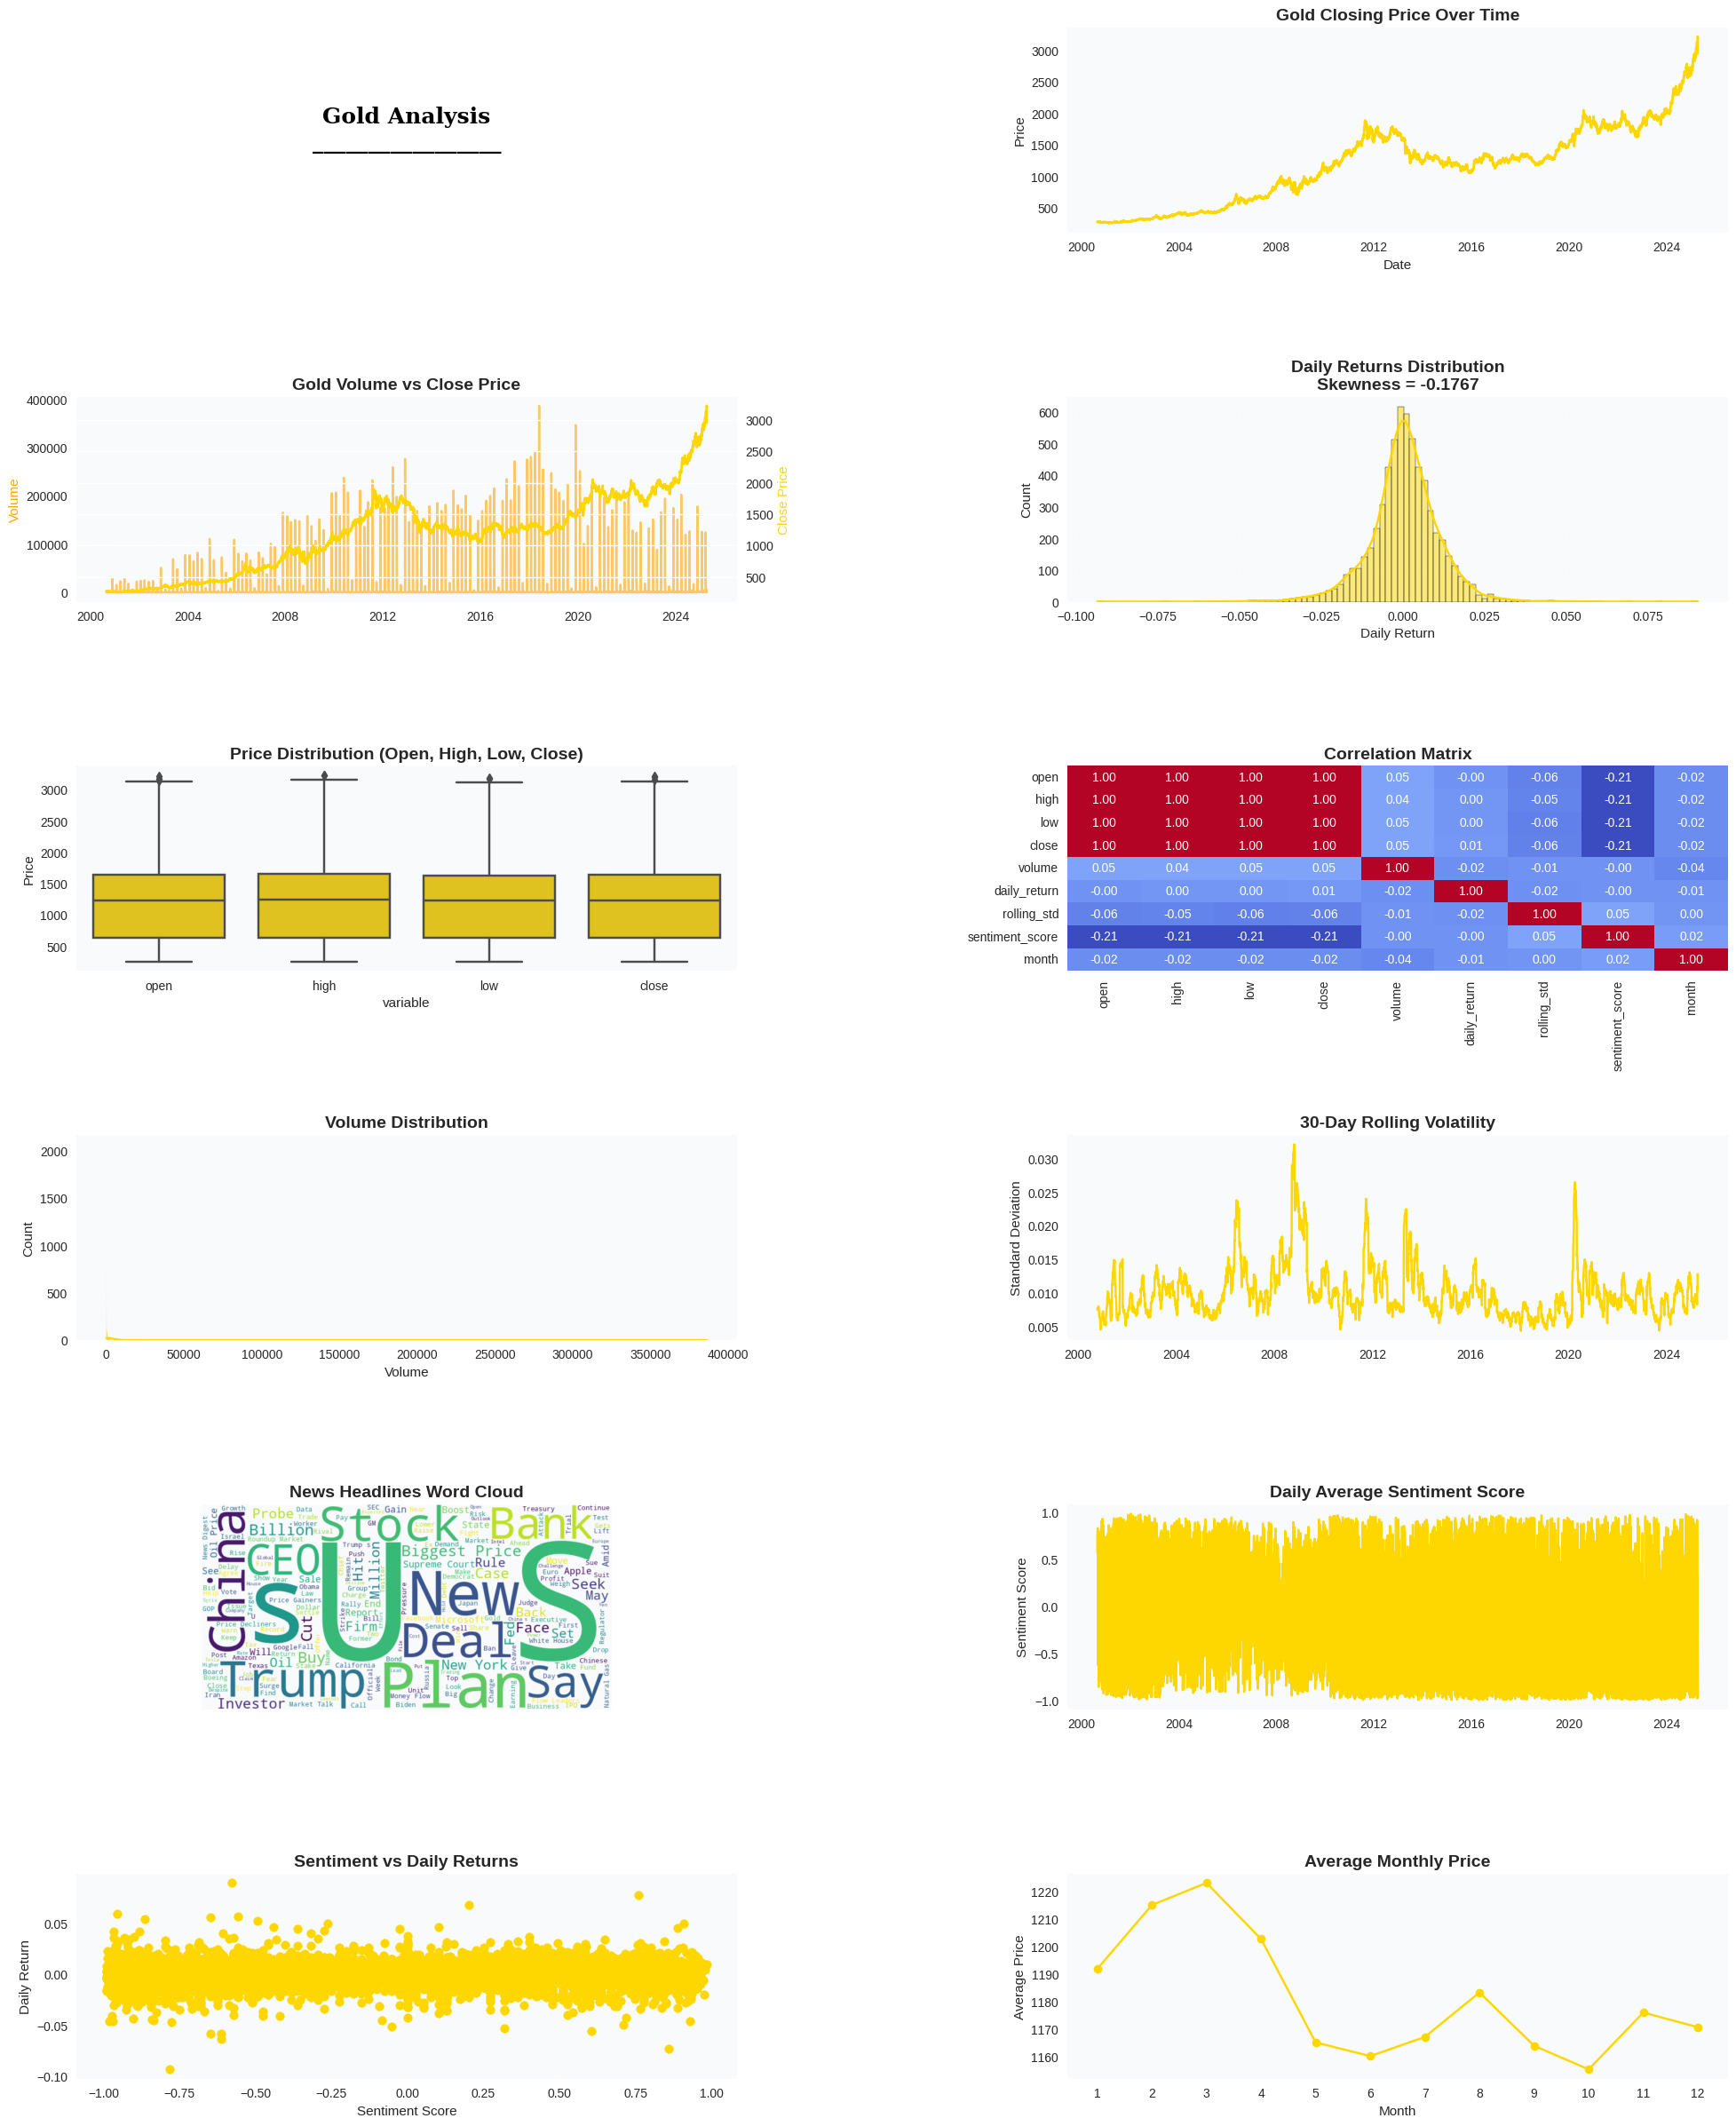

In [29]:
# Gold
analyze_precious_metal(data_gold, 'Gold', 'gold')

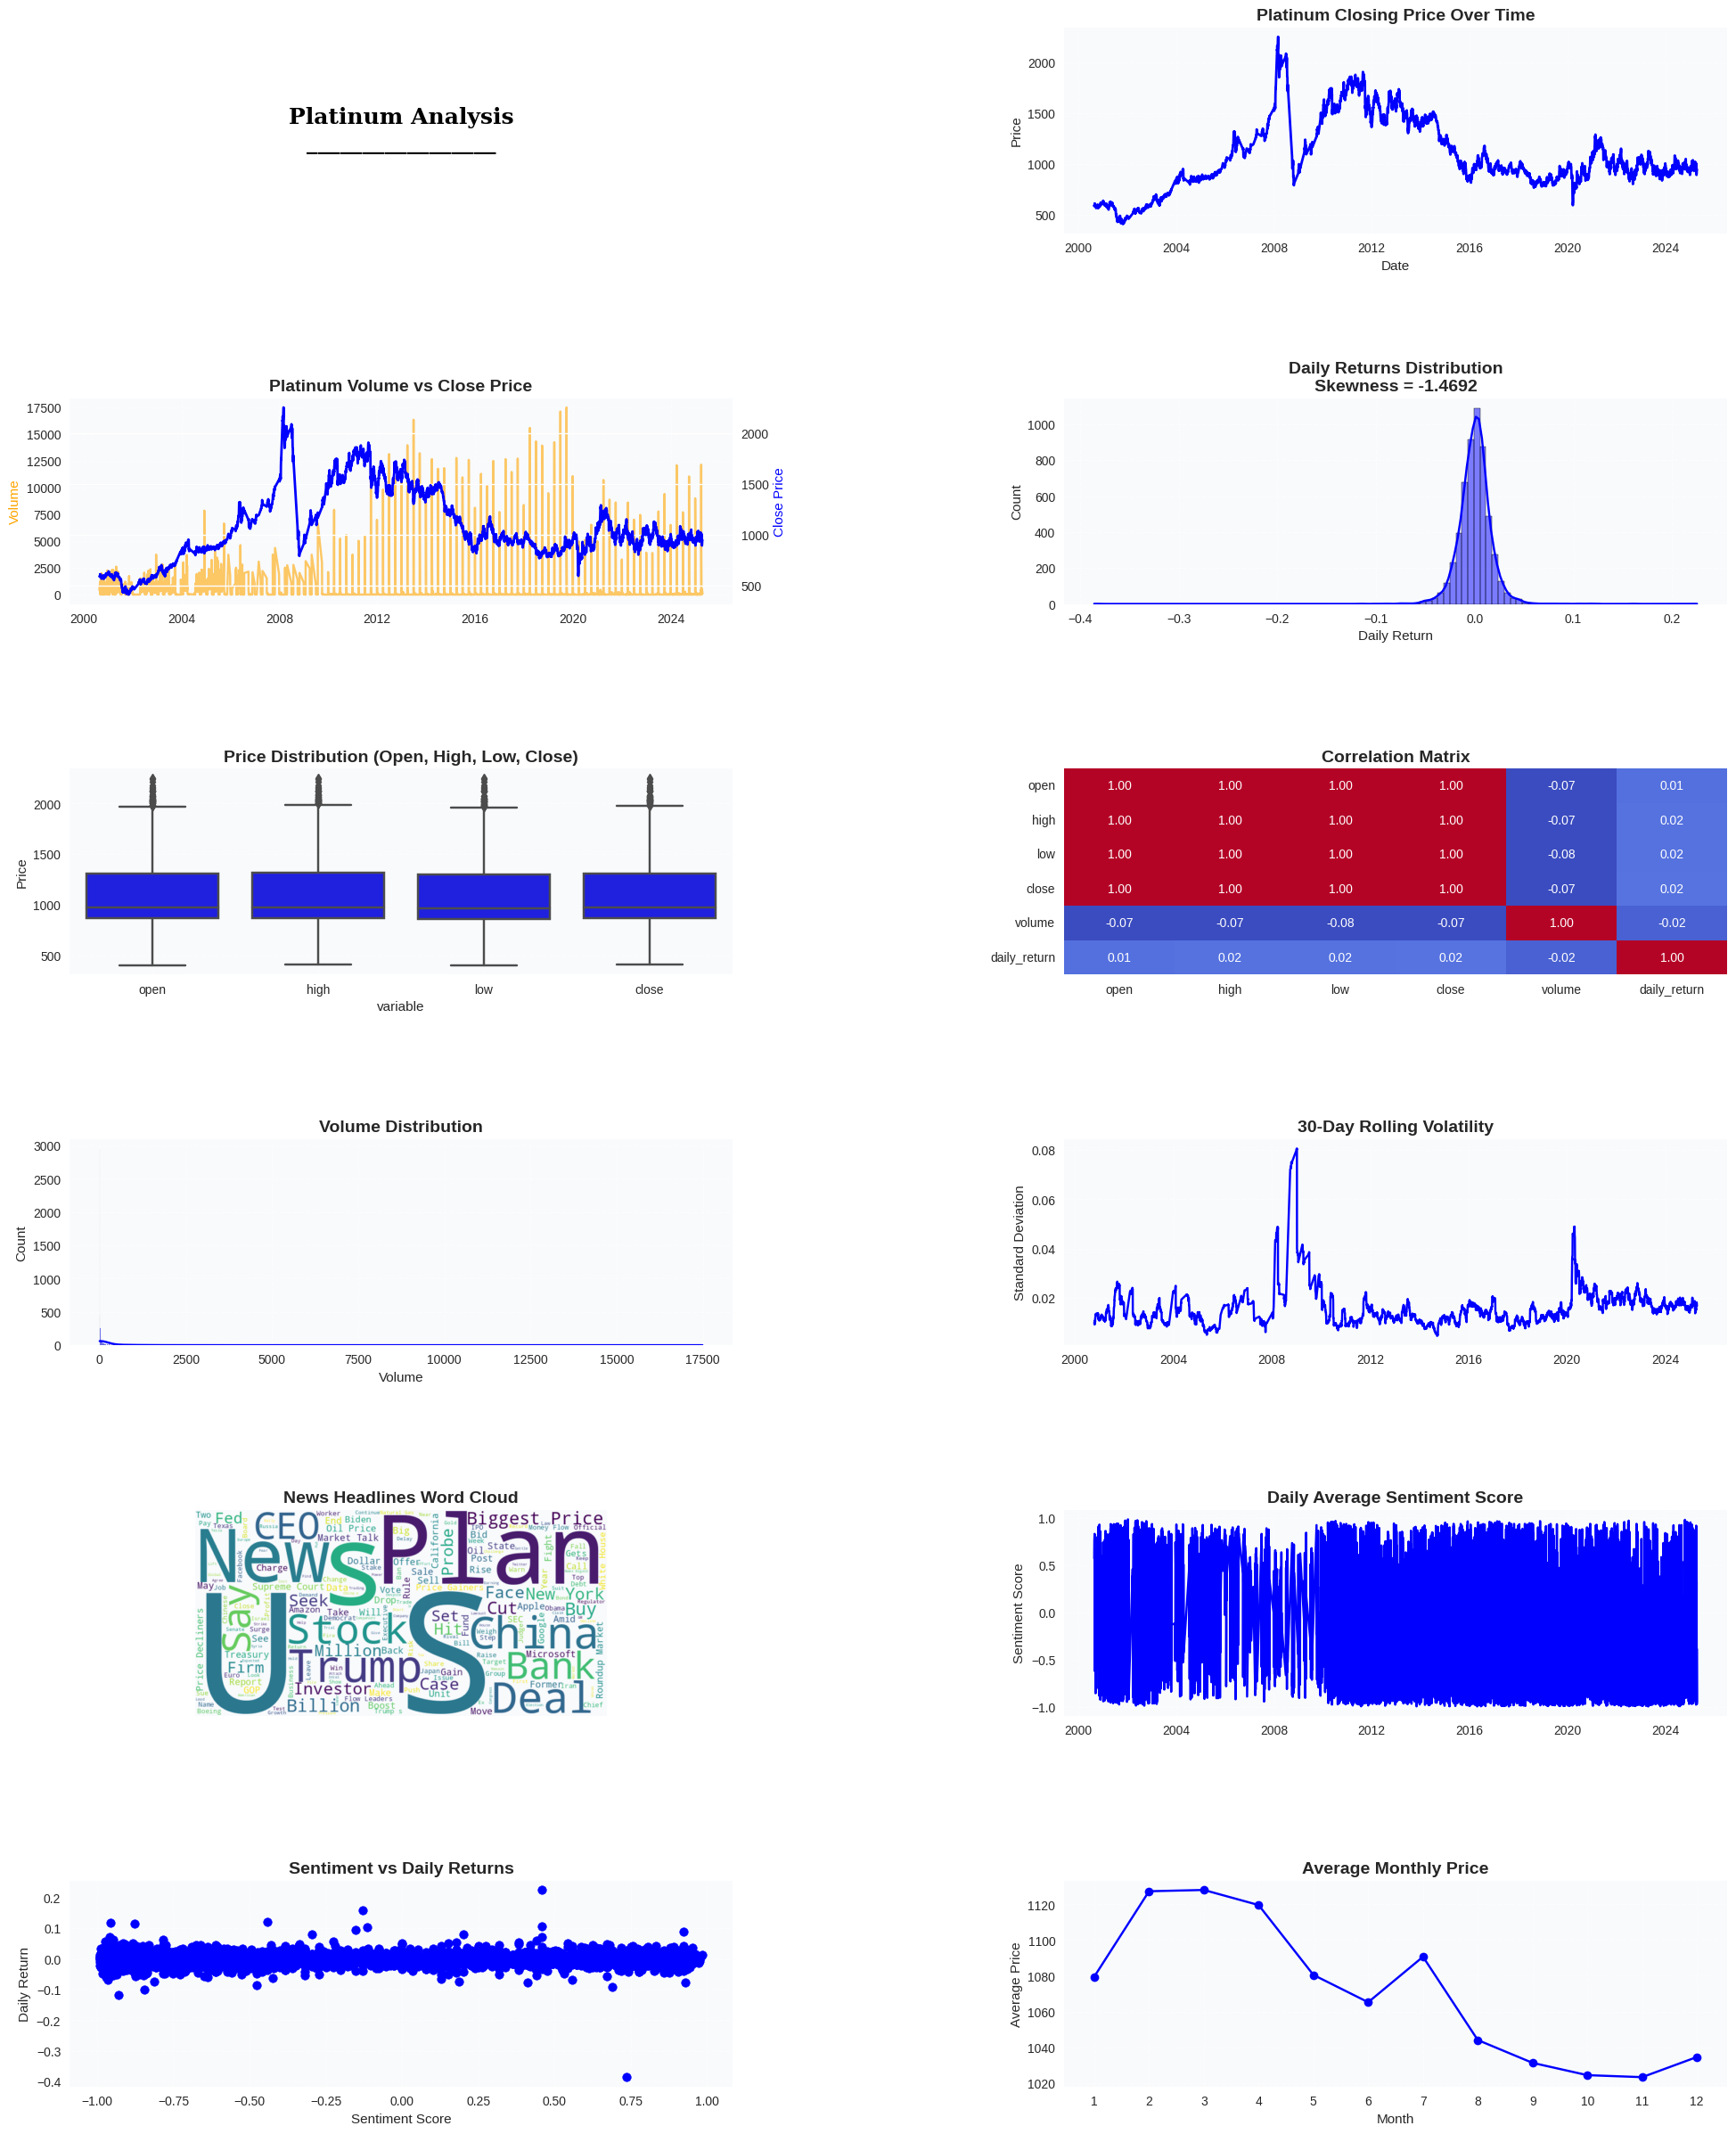

In [34]:
analyze_precious_metal(data_platinum, 'Platinum', 'blue')

In [36]:
# Precious Metals Closing Prices
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_gold['timestamp'], y=data_gold['close'], mode='lines', name='Gold', line=dict(color='gold')))
fig.add_trace(go.Scatter(x=data_silver['timestamp'], y=data_silver['close'], mode='lines', name='Silver', line=dict(color='silver')))
fig.add_trace(go.Scatter(x=data_platinum['timestamp'], y=data_platinum['close'], mode='lines', name='Platinum', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data_palladium['timestamp'], y=data_palladium['close'], mode='lines', name='Palladium', line=dict(color='purple')))

fig.update_layout(
    title='Precious Metals Closing Prices',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.show(renderer='iframe')

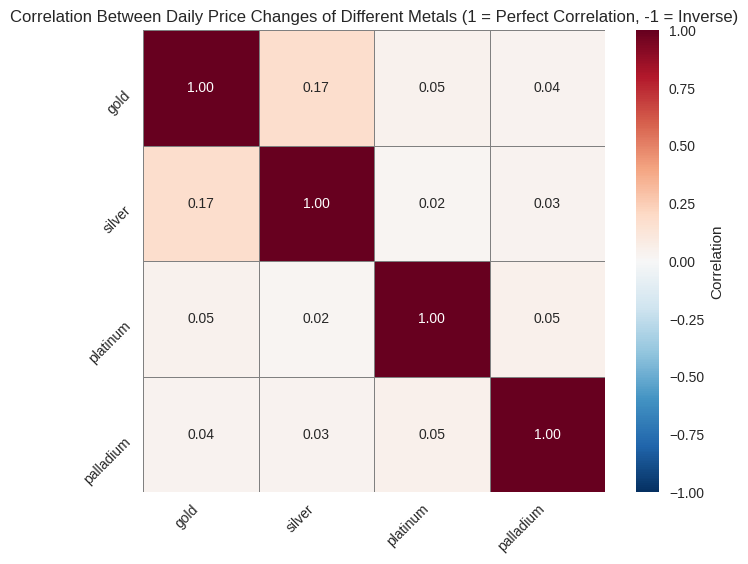

In [39]:
# Correlation Matrix
returns = pd.DataFrame({
    'gold': data_gold['daily_return'],
    'silver': data_silver['daily_return'],
    'platinum': data_platinum['daily_return'],
    'palladium': data_palladium['daily_return']
})

returns = returns.dropna()

corr_matrix = returns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', fmt='.2f', vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlation'}, annot_kws={'size': 10}, linewidths=0.5, 
            linecolor='gray', square=True)
plt.title('Correlation Between Daily Price Changes of Different Metals (1 = Perfect Correlation, -1 = Inverse)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')
plt.show()

---

# Testing

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from statsmodels.tsa.seasonal import seasonal_decompose

# Enhanced Sentiment Analysis

# Perform advanced sentiment analysis with visualizations
def enhanced_sentiment_analysis(data, metal_name):
    sia = SentimentIntensityAnalyzer()
    
    # Calculate sentiment scores
    data['sentiment'] = data['headlines'].apply(lambda x: sia.polarity_scores(str(x)))
    data[['neg', 'neu', 'pos', 'compound']] = data['sentiment'].apply(pd.Series)
    
    # Plot sentiment distribution
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(data['compound'], bins=50, ax=axes[0], kde=True, color='skyblue')
    axes[0].set_title(f'Sentiment Distribution - {metal_name}', fontsize=14)
    sentiment_counts = pd.cut(data['compound'], 
                             bins=[-1, -0.5, 0, 0.5, 1],
                             labels=['Negative', 'Neutral', 'Positive', 'Very Positive']).value_counts()
    sentiment_counts.plot.pie(autopct='%1.1f%%', ax=axes[1], colors=['red', 'gray', 'green', 'blue'])
    axes[1].set_title('Sentiment Proportions', fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    # Temporal evolution of sentiment
    monthly_sentiment = data.resample('M', on='timestamp')['compound'].mean()
    plt.figure(figsize=(12, 6))
    monthly_sentiment.plot(color='purple')
    plt.title(f'Monthly Sentiment Trend - {metal_name}')
    plt.ylabel('Average Compound Sentiment')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Topic Analysis using TF-IDF
def topic_analysis(data, metal_name, max_features=100):
    # Extract key topics using TF-IDF analysis
    tfidf = TfidfVectorizer(max_features=max_features, stop_words='english')
    tfidf_matrix = tfidf.fit_transform(data['headlines'].astype(str))
    
    feature_names = tfidf.get_feature_names_out()
    dense = tfidf_matrix.todense()
    mean_tfidf = dense.mean(axis=0).tolist()[0]
    
    tfidf_df = pd.DataFrame({'word': feature_names, 'tfidf': mean_tfidf})
    top_words = tfidf_df.sort_values('tfidf', ascending=False).head(20)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='tfidf', y='word', data=top_words, palette='viridis')
    plt.title(f'Top Keywords in Headlines - {metal_name}')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Keyword')
    plt.show()

# Time Series Decomposition

# Perform time series decomposition into trend, seasonality, and residuals
def time_series_decomposition(data, metal_name, period=365):
    ts_data = data.set_index('timestamp')['close']
    decomposition = seasonal_decompose(ts_data, period=period, model='additive')
    
    fig = decomposition.plot()
    fig.set_size_inches(12, 8)
    fig.suptitle(f'Time Series Decomposition - {metal_name}', y=1.02)
    plt.tight_layout()
    plt.show()

# Advanced Volatility Analysis

# Analyze rolling volatility with different time windows
def advanced_volatility_analysis(data, metal_name):
    data['rolling_vol_7'] = data['daily_return'].rolling(7).std() * np.sqrt(252)
    data['rolling_vol_30'] = data['daily_return'].rolling(30).std() * np.sqrt(252)
    data['rolling_vol_90'] = data['daily_return'].rolling(90).std() * np.sqrt(252)
    
    plt.figure(figsize=(12, 6))
    plt.plot(data['timestamp'], data['rolling_vol_7'], label='7-Day Volatility')
    plt.plot(data['timestamp'], data['rolling_vol_30'], label='30-Day Volatility')
    plt.plot(data['timestamp'], data['rolling_vol_90'], label='90-Day Volatility')
    
    plt.title(f'Annualized Volatility - {metal_name}')
    plt.ylabel('Volatility')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Comparative Analysis Between Metals

# Compare cumulative returns and volatility across metals
def comparative_analysis(metals_dict):
    # Cumulative returns
    plt.figure(figsize=(12, 6))
    for name, data in metals_dict.items():
        cum_returns = (1 + data['daily_return']).cumprod()
        plt.plot(data['timestamp'], cum_returns, label=name)
    
    plt.title('Comparative Cumulative Returns')
    plt.ylabel('Cumulative Return')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Volatility comparison
    volatilities = []
    for name, data in metals_dict.items():
        vol = data['daily_return'].std() * np.sqrt(252)
        volatilities.append({'Metal': name, 'Annualized Volatility': vol})
    
    vol_df = pd.DataFrame(volatilities)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Metal', y='Annualized Volatility', data=vol_df, palette='rocket')
    plt.title('Volatility Comparison Across Metals')
    plt.show()

# Main Analysis Function per Metal

# Perform full analysis on a precious metal
def analyze_precious_metal(data, metal_name, color):
    plt.figure(figsize=(14, 8))
    
    plt.plot(data['timestamp'], data['close'], color=color)
    plt.title(f'{metal_name} Closing Price Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()
    
    enhanced_sentiment_analysis(data, metal_name)
    topic_analysis(data, metal_name)
    time_series_decomposition(data, metal_name)
    advanced_volatility_analysis(data, metal_name)

# Metal Relationship Analysis

# Analyze relationship and correlation between different metals
def metals_relationship_analysis(metals_dict):
    close_prices = pd.DataFrame()
    for name, data in metals_dict.items():
        close_prices[name] = data.set_index('timestamp')['close']
    
    norm_prices = close_prices / close_prices.iloc[0]
    
    plt.figure(figsize=(12, 6))
    for metal in norm_prices.columns:
        plt.plot(norm_prices.index, norm_prices[metal], label=metal)
    
    plt.title('Normalized Price Evolution Across Metals')
    plt.ylabel('Normalized Price')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Calculate rolling correlations
    rolling_corr = close_prices.rolling(90).corr()
    
    # Create subplots for each metal pair
    metals = list(close_prices.columns)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    axes = axes.flatten()
    
    for i, (metal1, metal2) in enumerate([(metals[0], metals[1]), 
                                         (metals[0], metals[2]), 
                                         (metals[0], metals[3]),
                                         (metals[1], metals[2])]):
        if i >= len(axes):
            break
            
        # Extract the correlation series for this pair
        corr_series = rolling_corr[metal1].xs(metal2, level=1)
        
        axes[i].plot(corr_series.index, corr_series)
        axes[i].set_title(f'90-Day Rolling Correlation: {metal1} vs {metal2}')
        axes[i].set_ylim(-1, 1)
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

# Full Execution
def app(metals_data):
    # Individual analysis
    for name, data in metals_data.items():
        color = 'gold' if name == 'Gold' else 'silver' if name == 'Silver' else 'blue' if name == 'Platinum' else 'purple'
        analyze_precious_metal(data, name, color)
    
    # Comparative analysis
    comparative_analysis(metals_data)
    metals_relationship_analysis(metals_data)

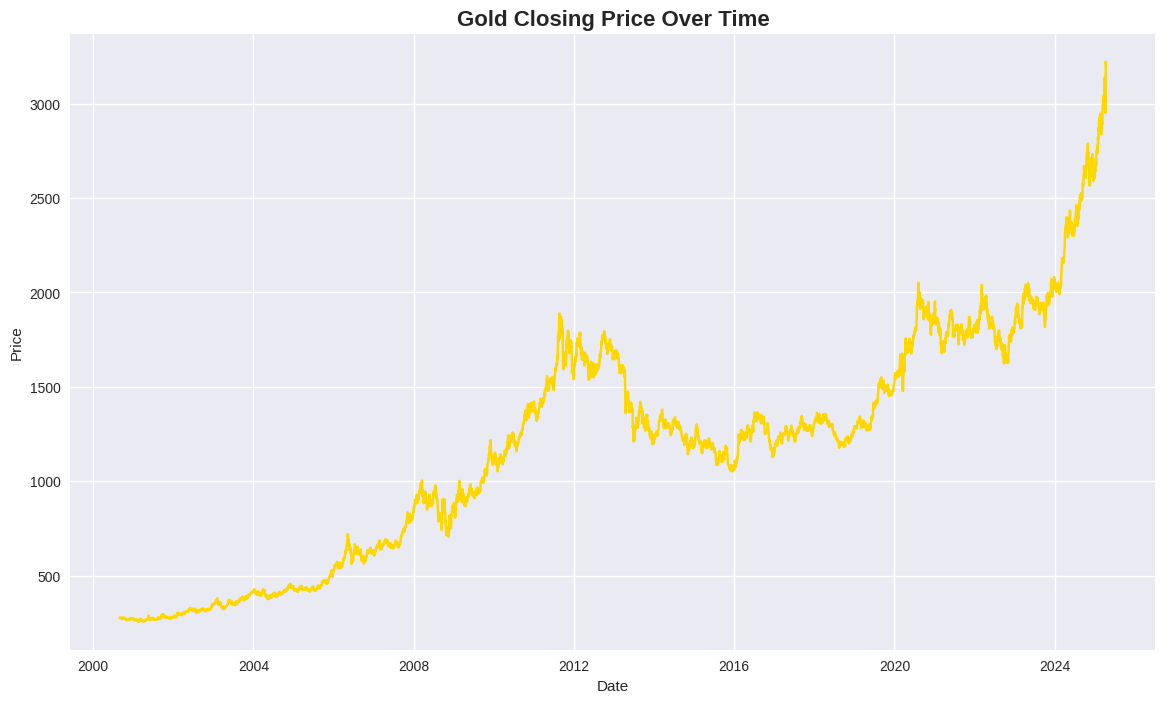

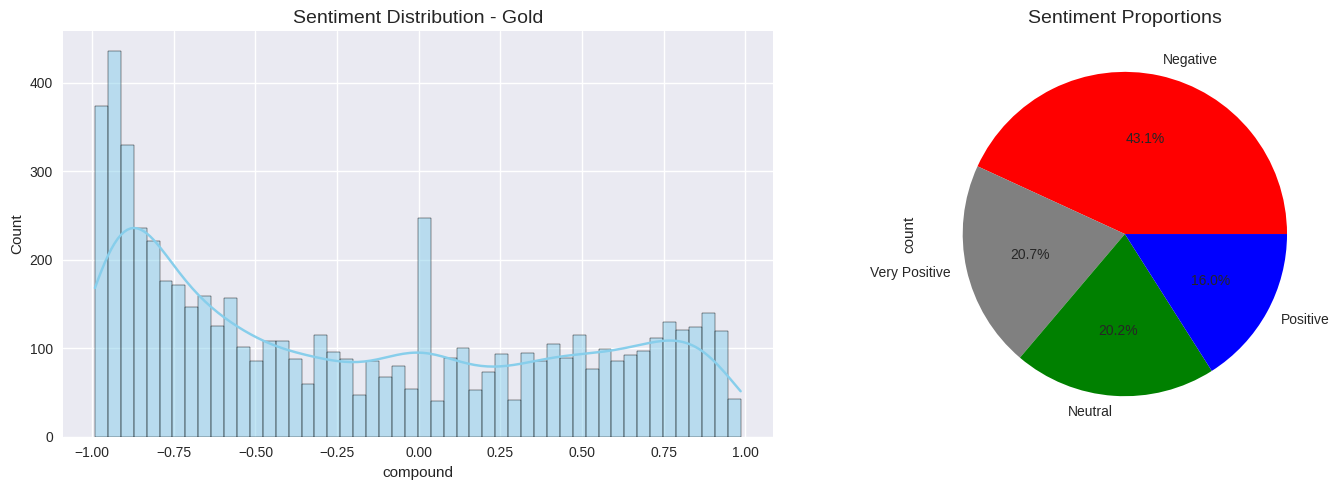

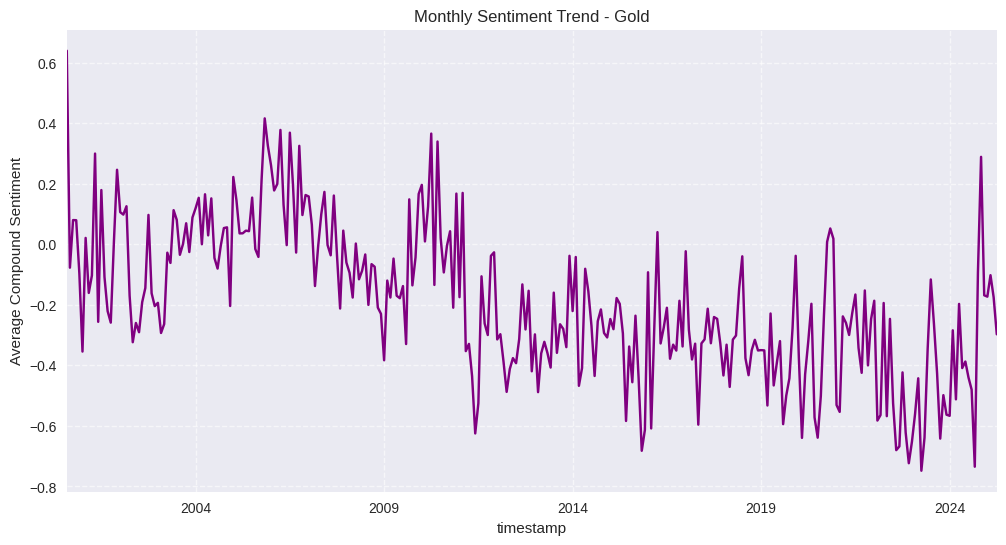

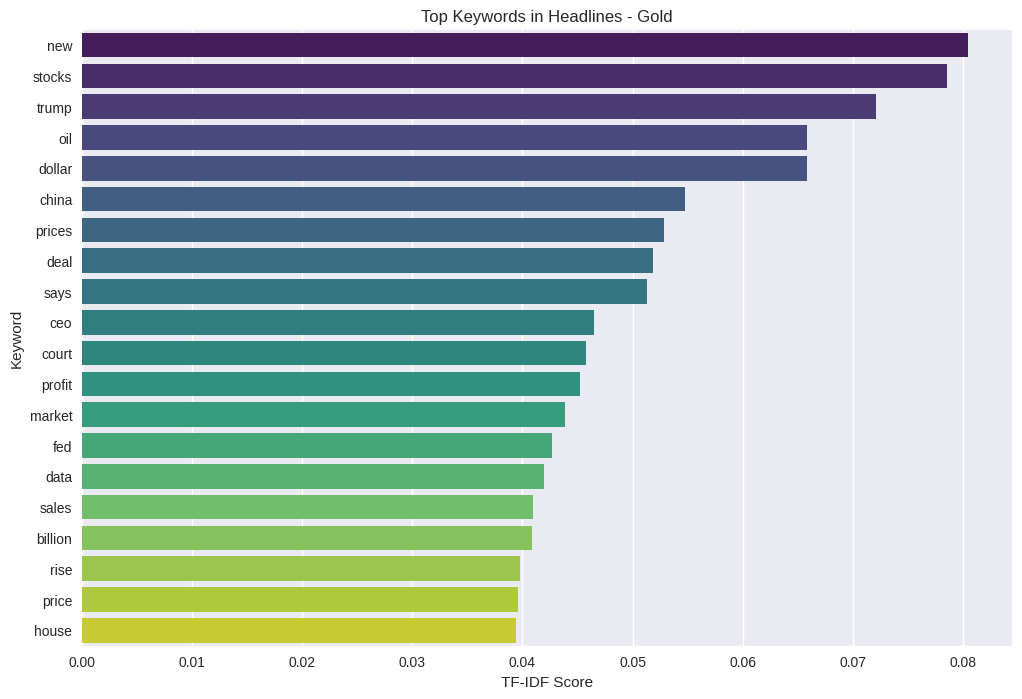

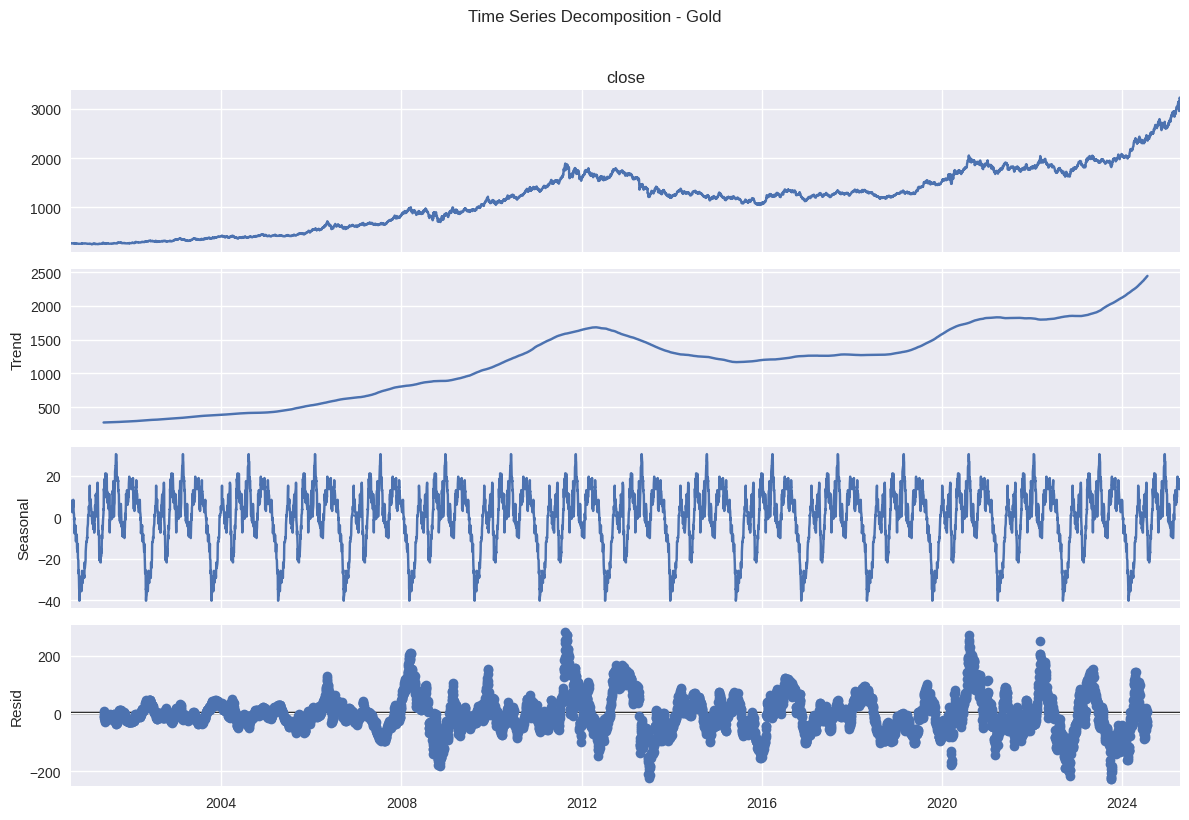

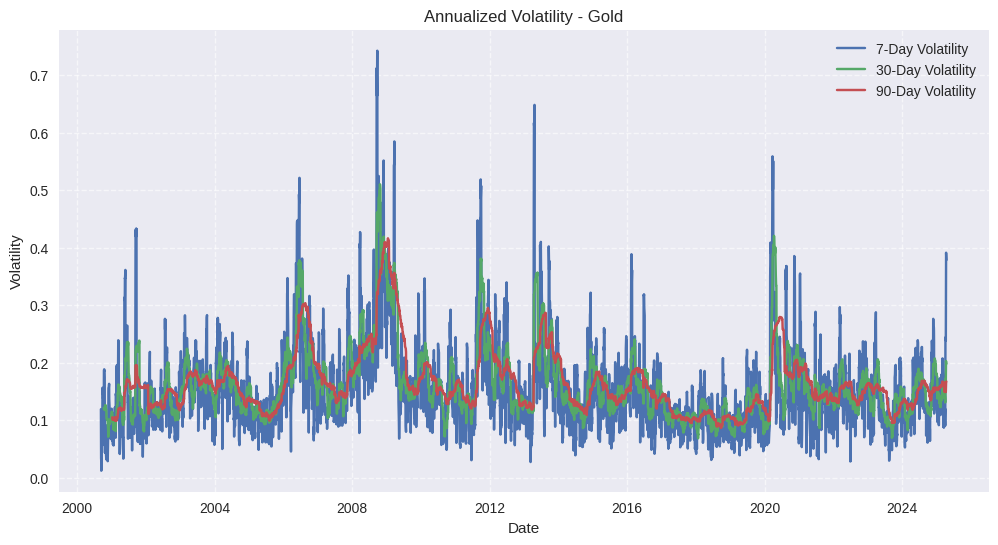

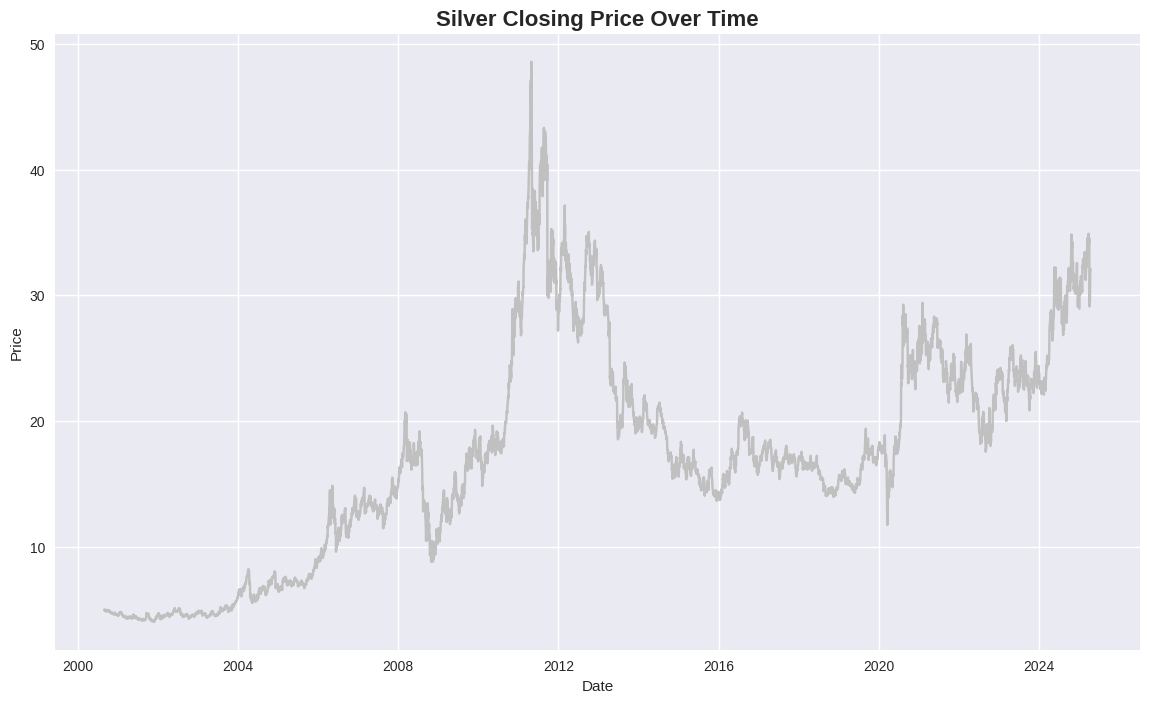

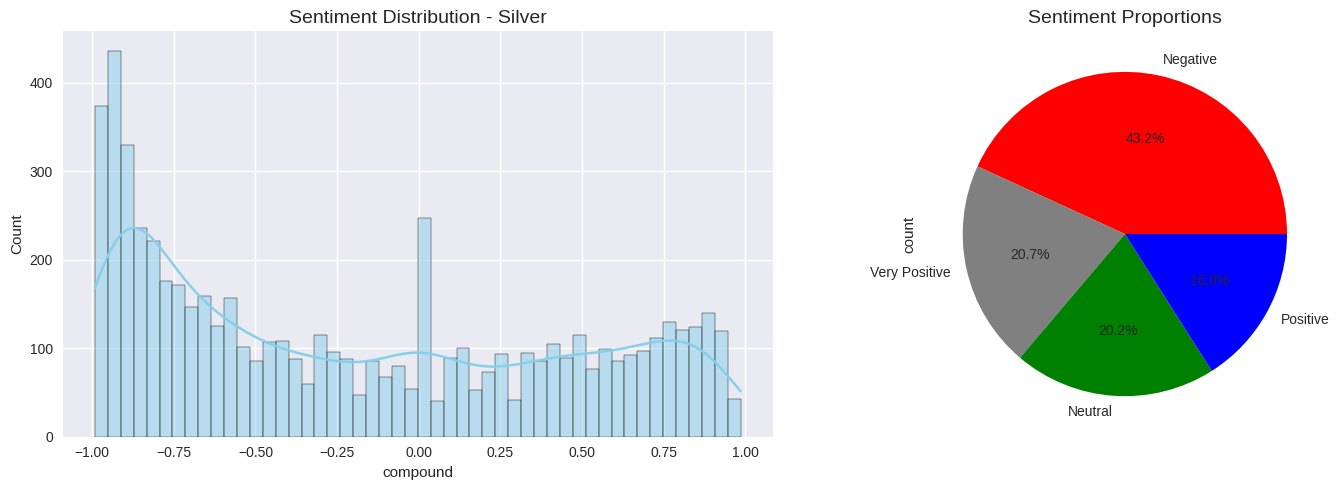

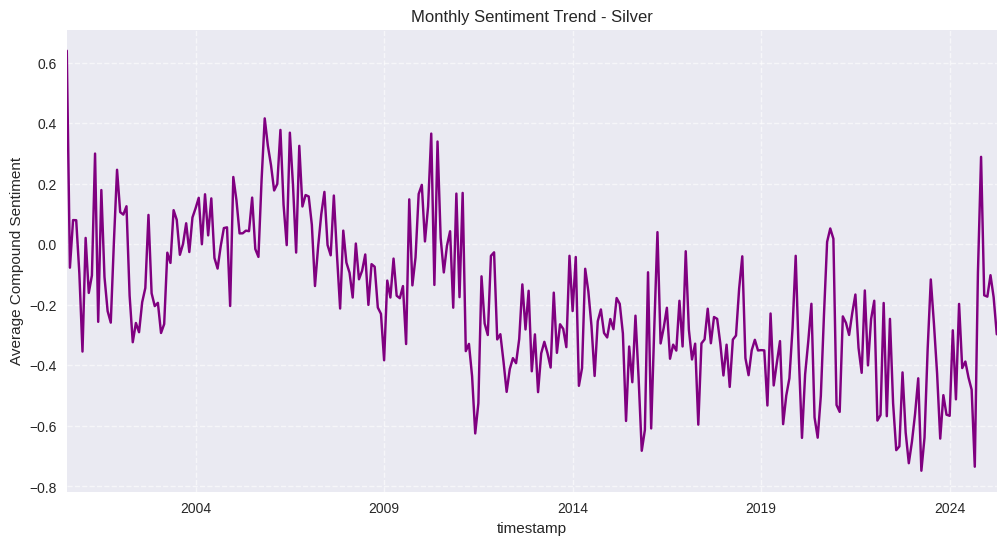

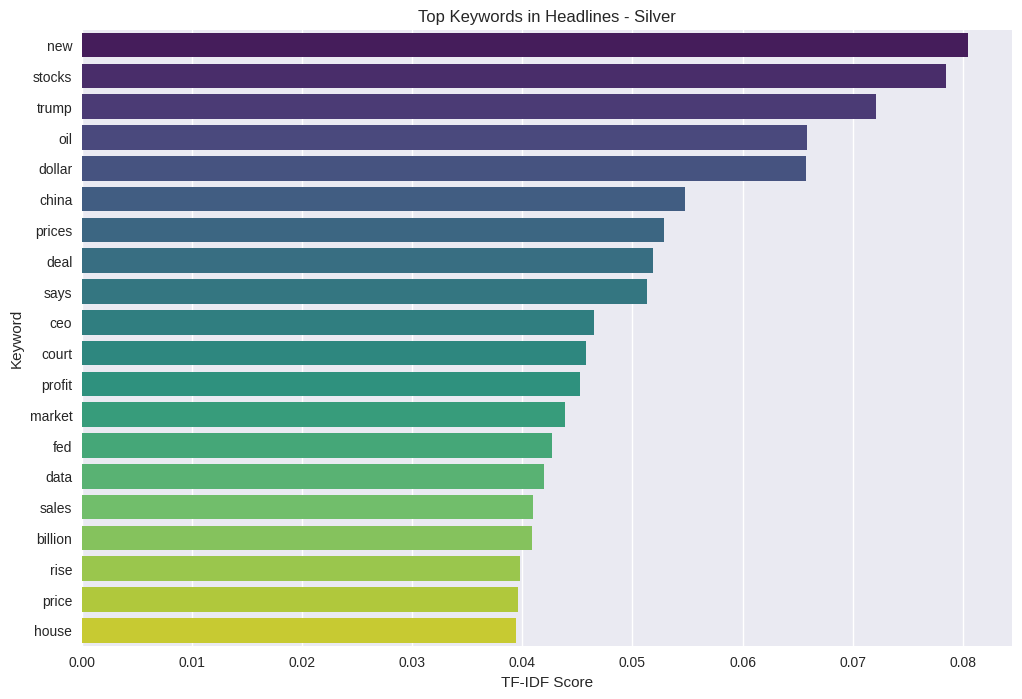

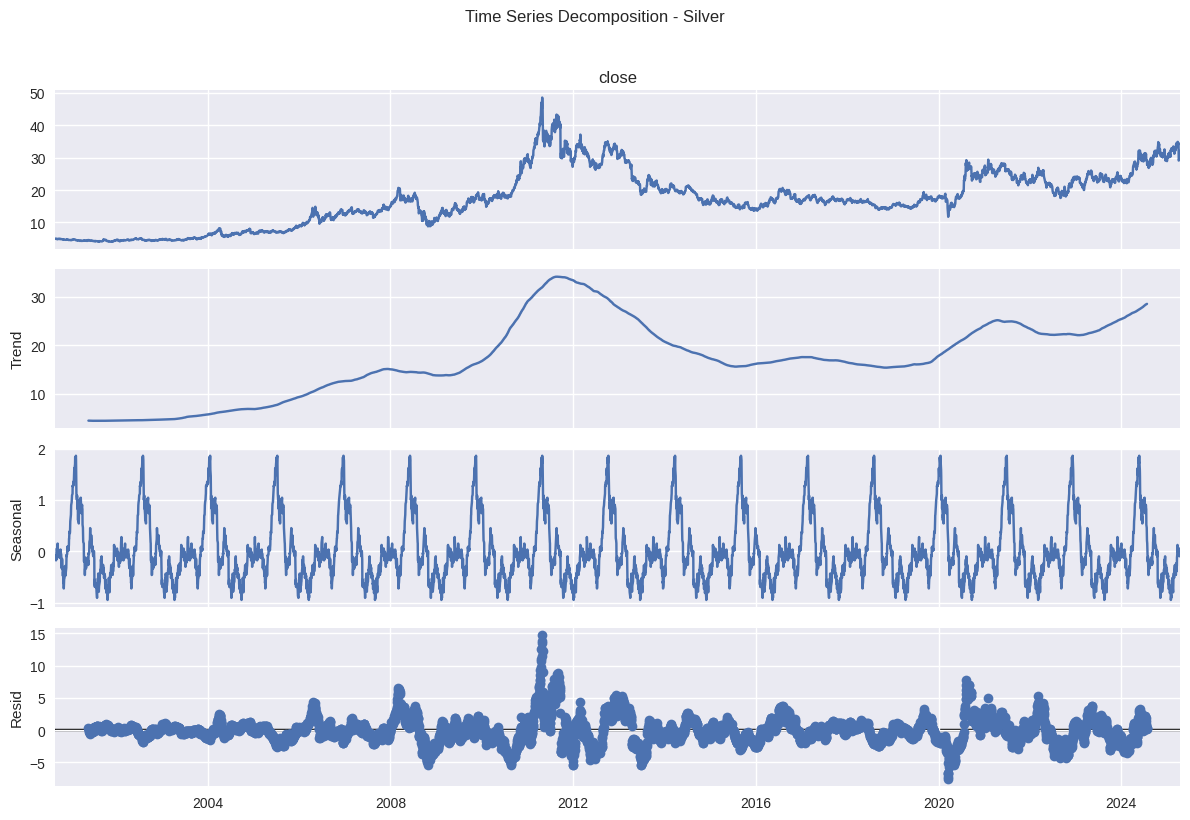

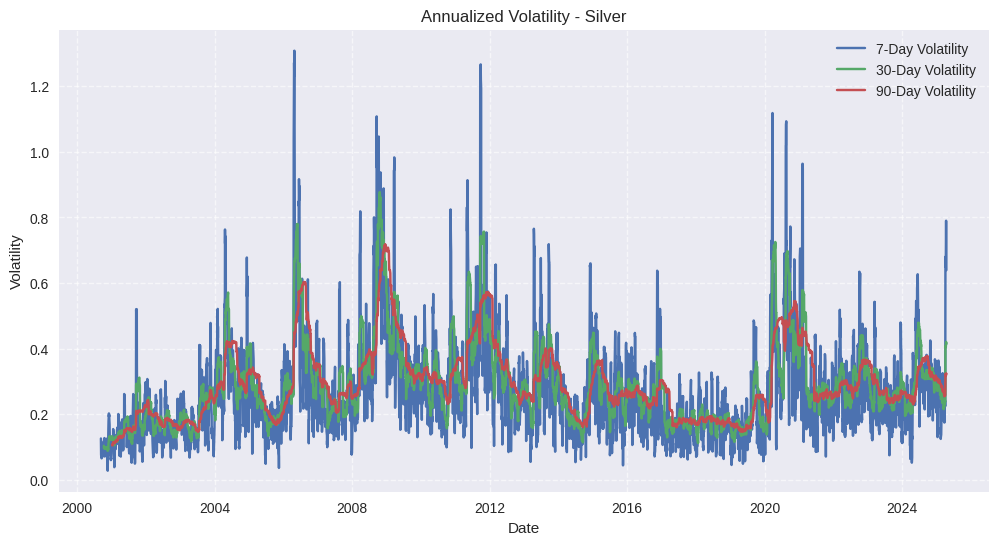

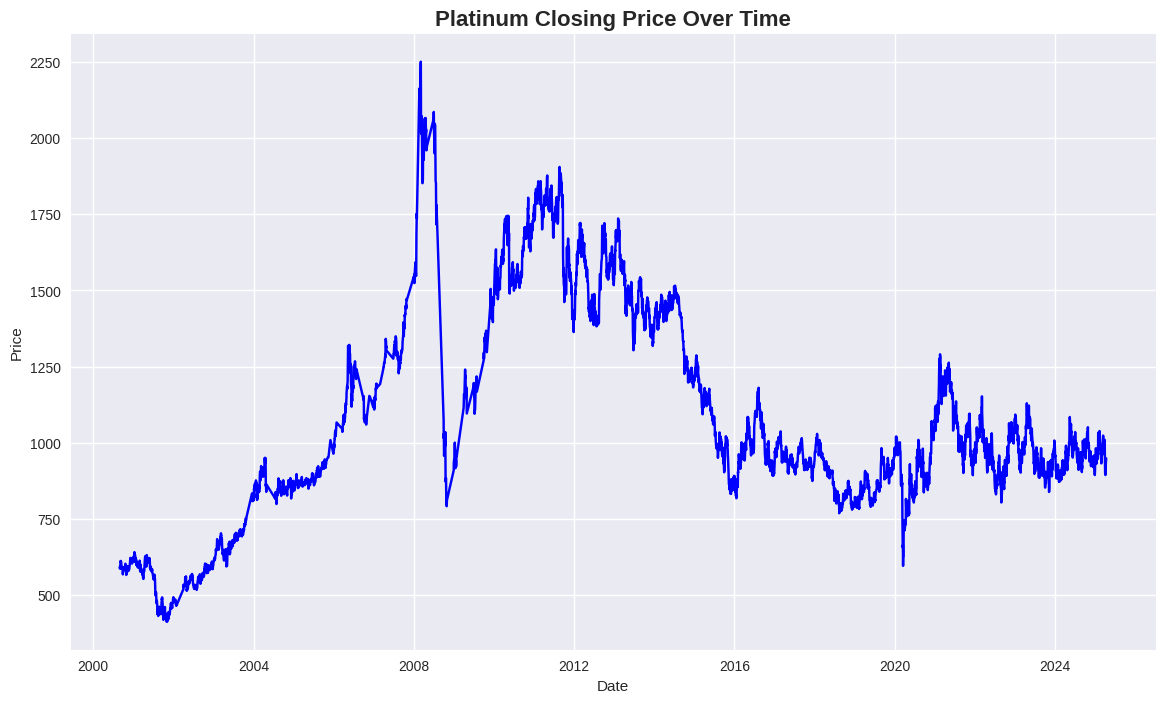

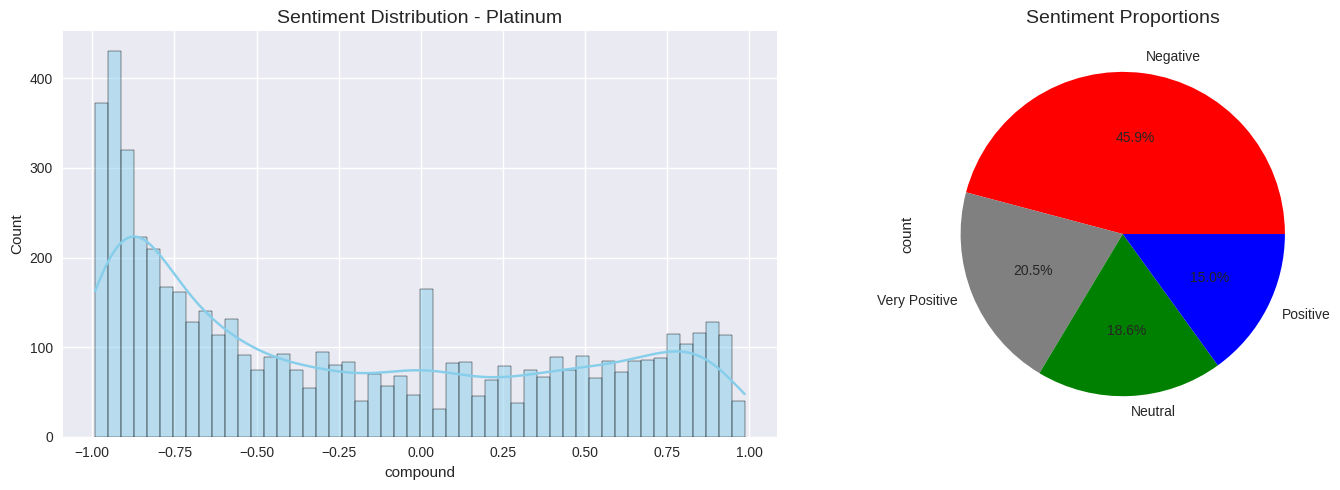

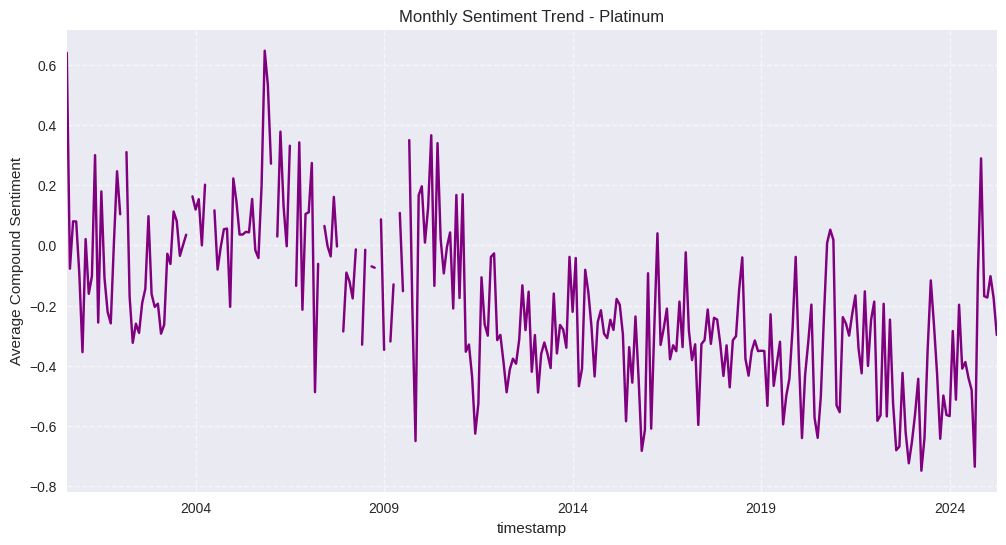

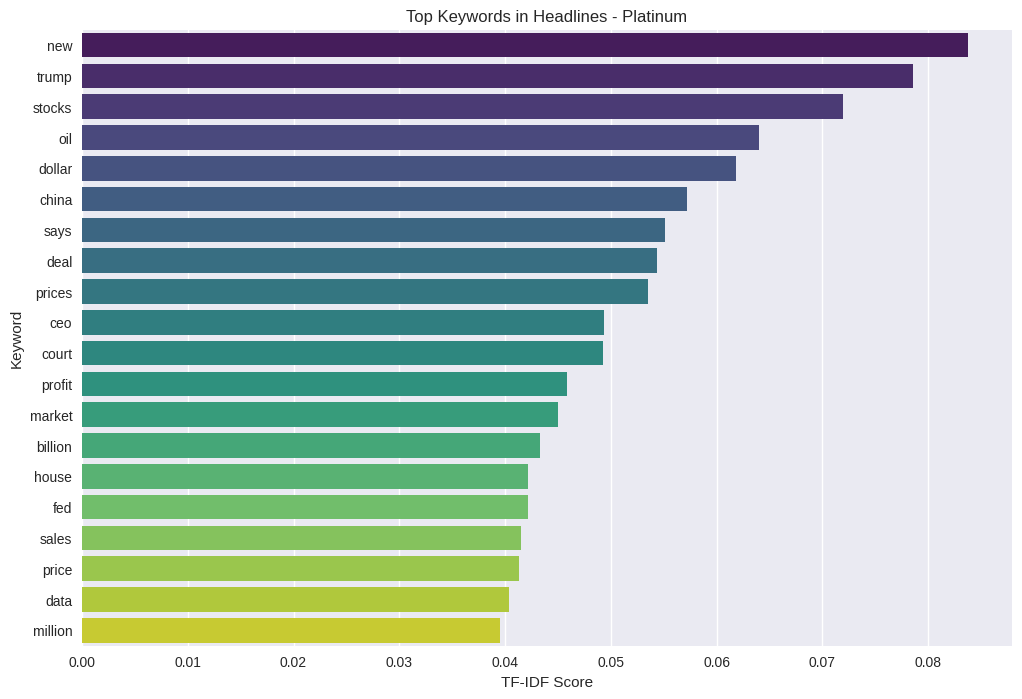

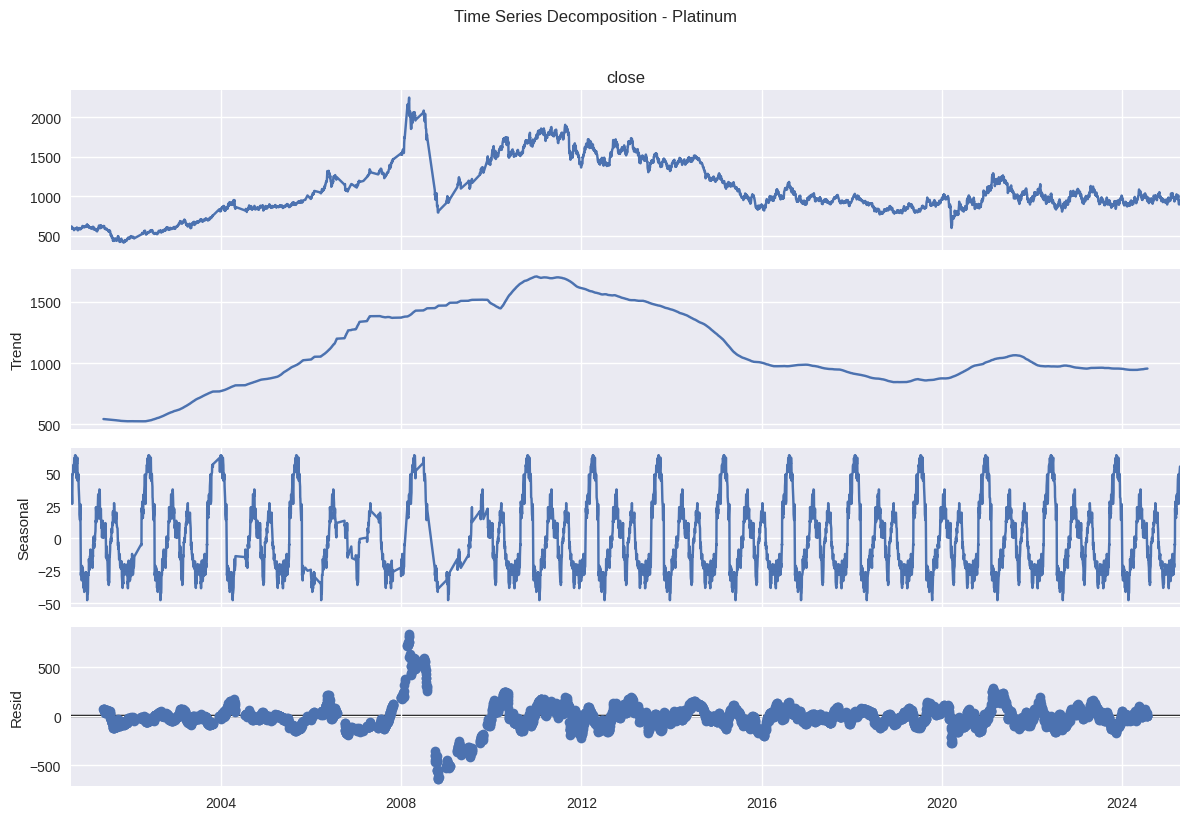

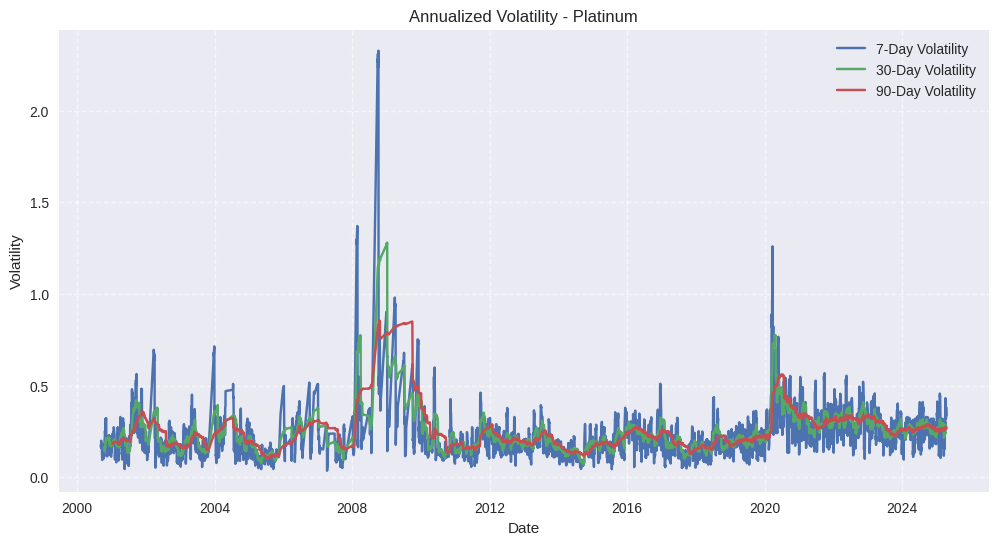

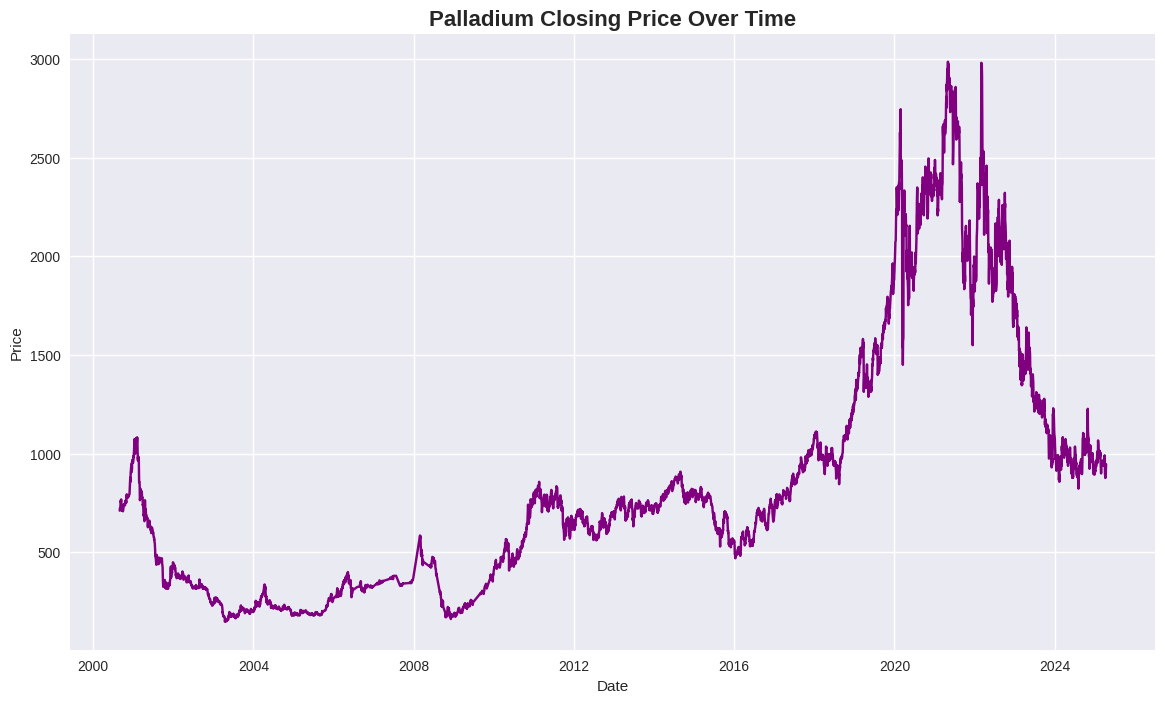

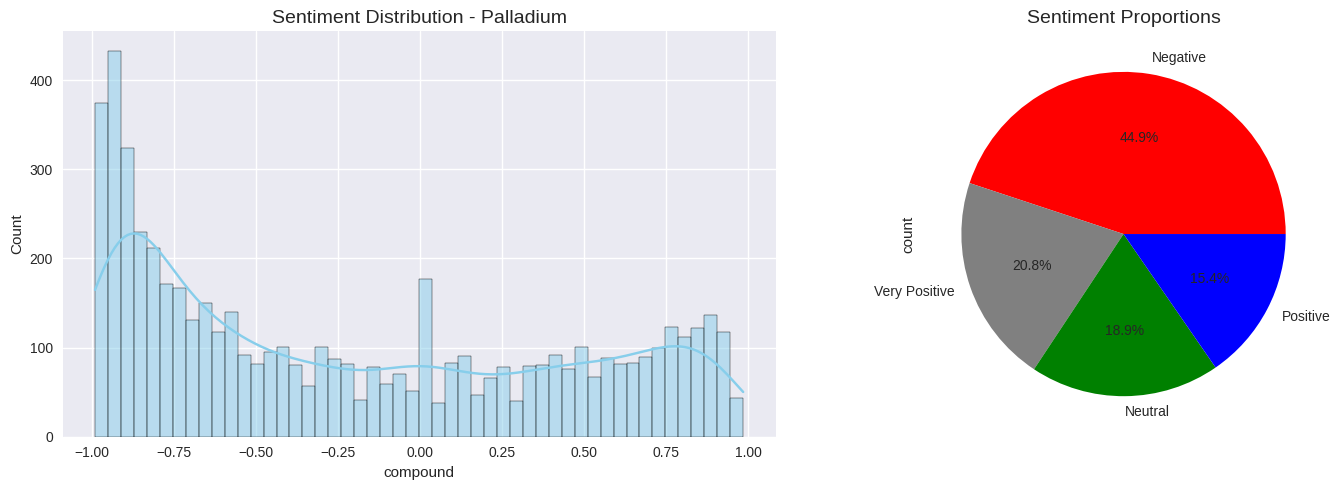

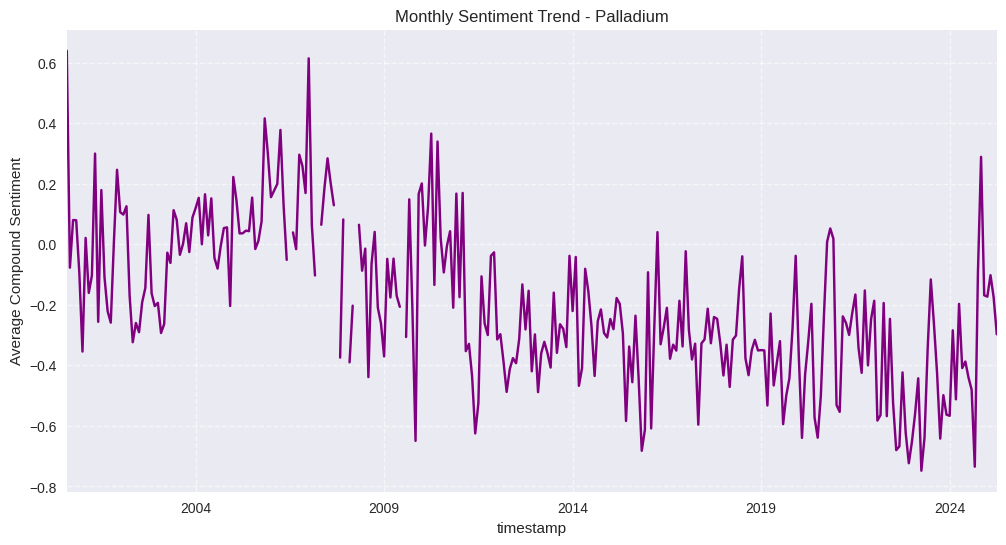

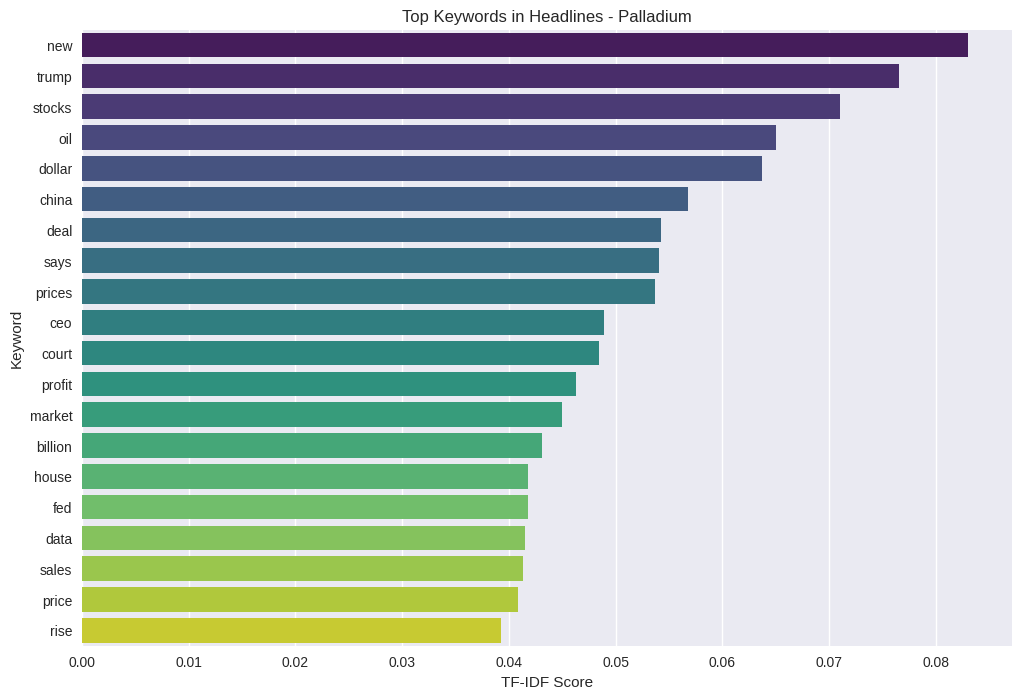

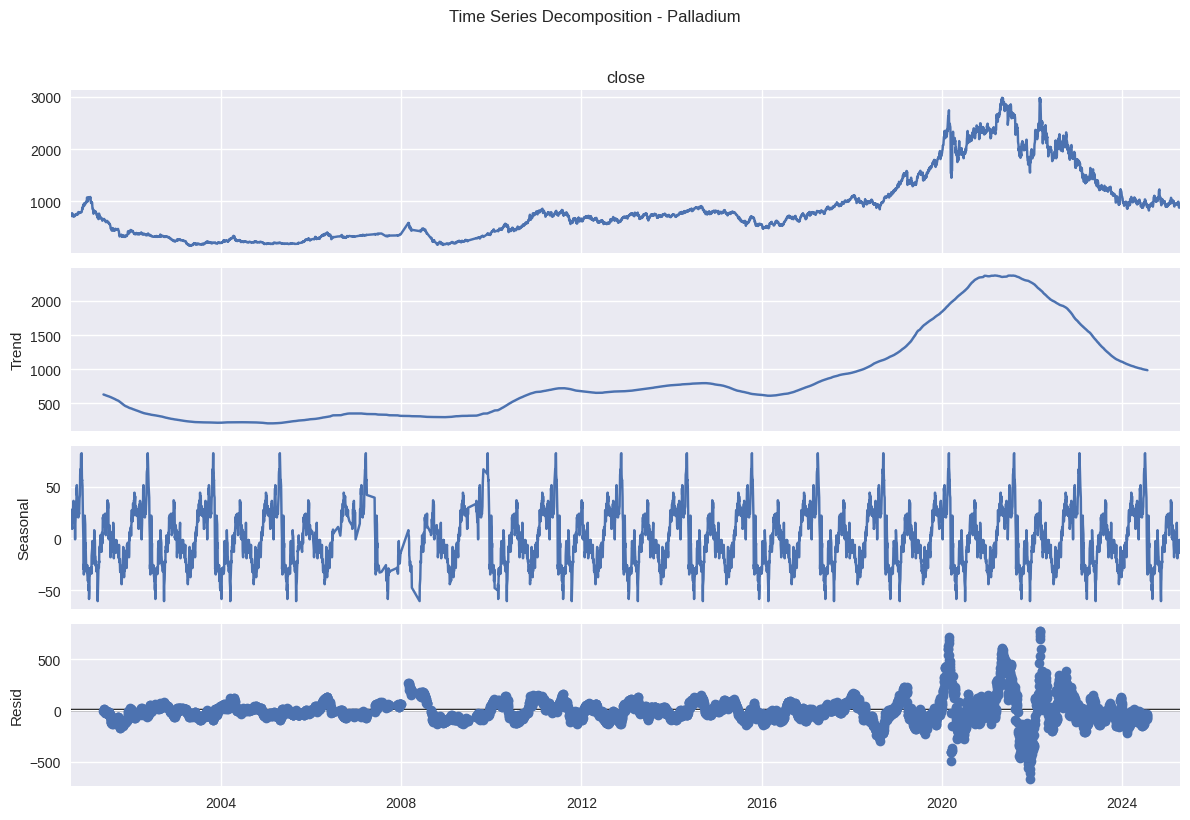

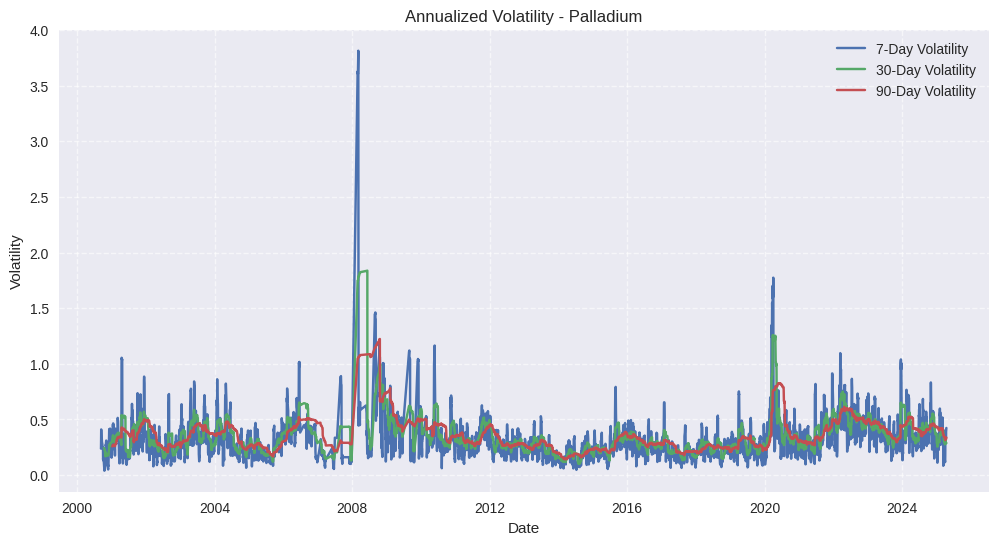

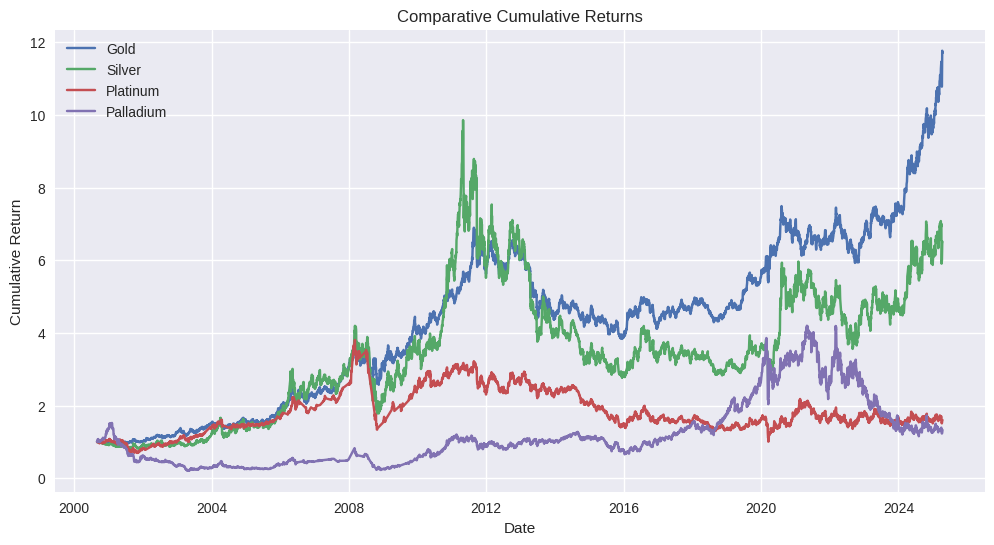

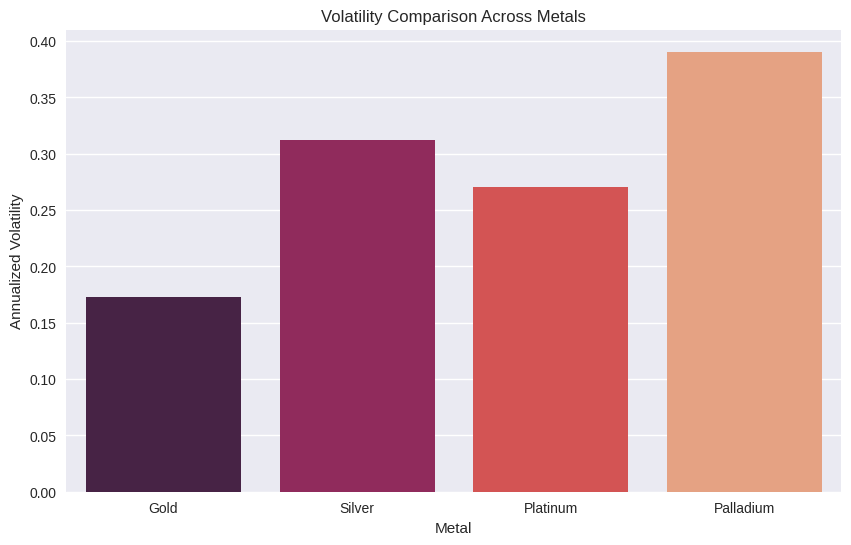

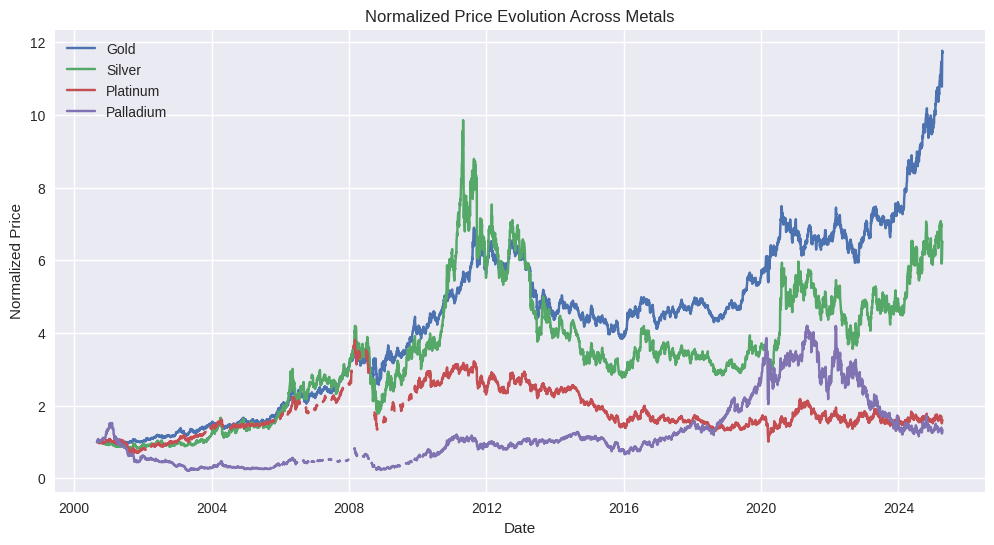

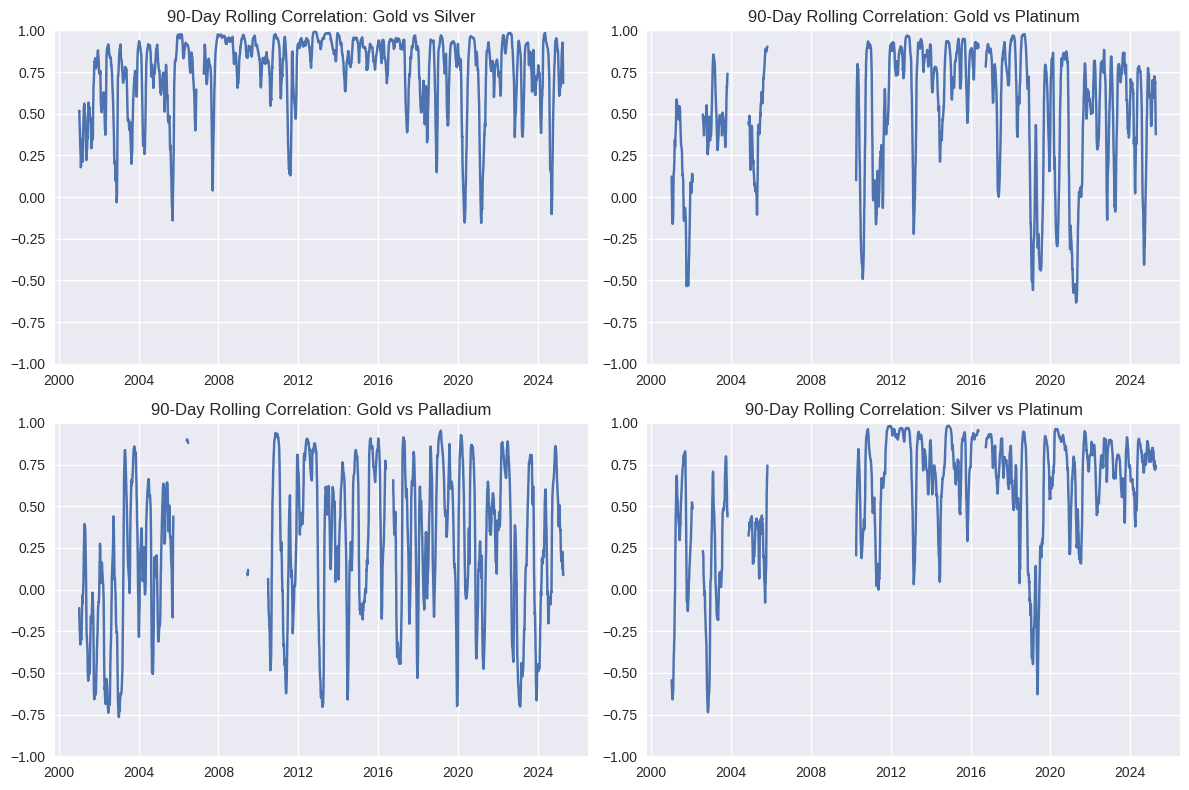

In [48]:
metals = {'Gold': data_gold, 'Silver': data_silver, 'Platinum': data_platinum, 'Palladium': data_palladium}
app(metals)